# 1. Intro to Temperature Options

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Cooling Degree Days (CDD) is a measure used to estimate the demand for air conditioning.
    - Hotter Spring, result in higher CDD
- Heating Degree Days (HDD) are a measure used to estimate the demand for heating. 
    - Warmer winter leads to lower HDD


In [2]:
temps = np.random.normal(65,5,92)
HDD_p = np.maximum(0, 65-temps)
CDD_p = np.maximum(0, temps-65)

df = pd.DataFrame(np.array([temps, HDD_p, CDD_p]).T, index=range(1,len(temps)+1), columns=['Avg Temp', 'HDD', 'CDD'])
df.loc['Total'] = pd.Series(df[['HDD', 'CDD']].sum())
round(df,2)

,Avg Temp,HDD,CDD
1,67.44,0.00,2.44
2,62.70,2.30,0.00
3,68.45,0.00,3.45
4,68.22,0.00,3.22
5,55.66,9.34,0.00
...,...,...,...
89,61.19,3.81,0.00
90,70.00,0.00,5.00
91,71.45,0.00,6.45
92,61.02,3.98,0.00


In [3]:
alpha = 5000 # pay off rate alpha is usually 5000 or 2500
beta = 5000 #
Kc = 750 #  Strike Price for Call
Kp = 550 #  Strike Price for Put
C = 5e5 # cap for call usually 500,000 or 1,000,000
F = 1e6 # floor for put

DD = np.arange(200,1000,10) # Degree Days
call = np.minimum(alpha*np.maximum(DD-Kc,0), C) # payoff for call option
put = np.minimum(alpha*np.maximum(Kp-DD,0), F) # payoff for put option
collar = call - put
# net payout of a collar strategy, which involves holding both a call and a put option. 
# The collar strategy is used to limit the financial risk within a certain range. 
# The net payout is the difference between the call and put payouts.

### Call with Cap

𝜉=𝑚𝑖𝑛{𝛼(𝐷𝐷–𝐾)+,𝐶}

Example: cruises suffer with reduced summer sales when there are extremely hot spring weather. To hedge risk the company buys an out of the money call on Spring CDD’s, possibly with a cap because the business will sell a minimum number of cruises no matter what.

Practical Example:
Imagine a cruise company anticipates that if the spring is significantly hotter than average (leading to high CDD values), fewer people will want to book summer cruises. To protect itself, the company buys a call option on Spring CDDs with a strike price set above the historical average CDD. If the actual CDD exceeds this strike price, the company receives a payout, compensating for the potential loss in cruise sales. The cap on the option ensures that the company does not overpay for this protection, aligning the cost of the hedge with the expected minimum sales level.
This strategy allows the cruise company to financially protect itself against the risk of reduced sales due to unusually hot spring weather, ensuring more stable financial performance.


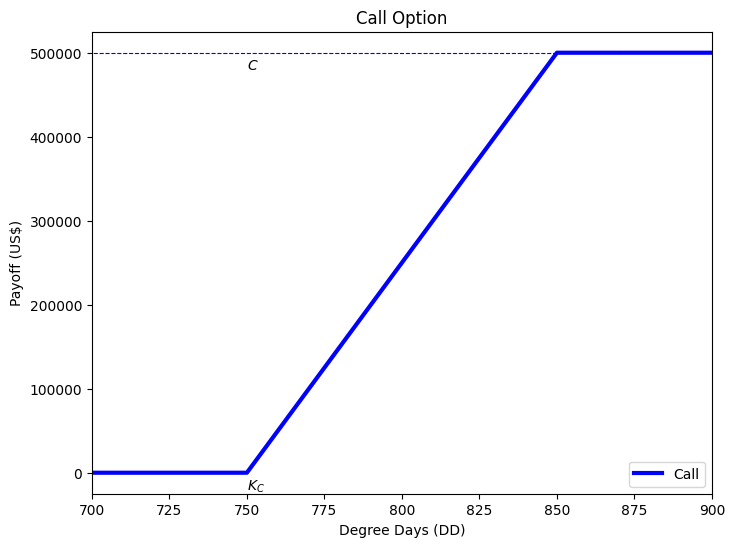

In [6]:
fig = plt.figure(figsize=(8,6))
plt.plot(DD, call, 'b', linewidth=3, label='Call')
plt.plot([200,1000],[C,C], 'b--', linewidth=0.8)

plt.text(750, C-.2e5, r'$C$')
plt.text(Kc, -.2e5, r'$K_C$')
plt.xlim([700,900])

plt.title('Call Option')
plt.xlabel('Degree Days (DD)')
plt.ylabel("Payoff (US$)")
plt.legend()
plt.show()

### Put with Floor

Example: To hedge risk that a warm winter decreases sales revenue from a gas company, they may choose to buy a put on HDD’s over the winter season.

𝜉=𝑚𝑖𝑛{𝛼(𝐾–𝐷𝐷)+,𝐹}

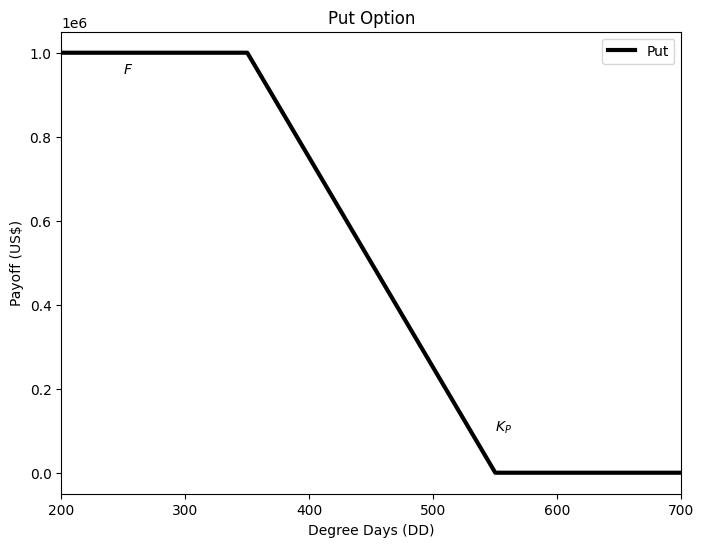

In [7]:
fig = plt.figure(figsize=(8,6))
plt.plot(DD, put, 'k', linewidth=3, label='Put')

plt.text(250, F-5e4, r'$F$')
plt.text(Kp, +.1e6, r'$K_P$')
plt.xlim([200,700])

plt.title('Put Option')
plt.xlabel('Degree Days (DD)')
plt.ylabel("Payoff (US$)")
plt.legend()
plt.show()

### Collar

Example: to hedge revenues against a mild winter, a gas company could enter into a zero dollar collar contract (no up-front cost) that pays the writer if the winter is cold and receives payment if the winter is warm.

𝜉=𝑚𝑖𝑛{𝛼(𝐷𝐷–𝐾1)+,𝐶}–𝑚𝑖𝑛{𝛽(𝐾2–𝐷𝐷)+,𝐹}

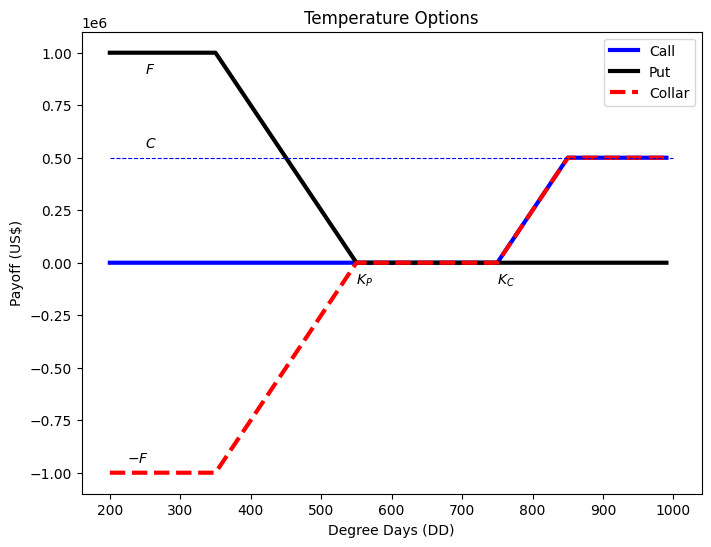

In [10]:
fig = plt.figure(figsize=(8,6))
plt.plot(DD, call, 'b', linewidth=3, label='Call')
plt.plot(DD, put, 'k', linewidth=3, label='Put')
plt.plot(DD, collar, 'r--', linewidth=3, label='Collar')
plt.plot([200,1000],[C,C], 'b--', linewidth=0.8)

plt.text(250, C+.5e5, r'$C$')
plt.text(250, F-1e5, r'$F$')
plt.text(225, -F+.5e5, r'$-F$')

plt.text(Kc, -.1e6, r'$K_C$')
plt.text(Kp, -.1e6, r'$K_P$')

plt.title('Temperature Options')
plt.xlabel('Degree Days (DD)')
plt.ylabel("Payoff (US$)")
plt.legend()
plt.show()

# 2. Statistical Analysis of Temperature Data

Dataset: Weather Observations for Sydney, Australia – Observatory Hill:

Dataset Start to End:
- Weather Station 1: 1-Jan 1859 – 30-Aug 2020
- Weather Station 2: 18-Oct 2017 – 3-Jul 2022

Data available: 
- Maximum Temperature
- Minimum Temperature

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

max_temp = pd.read_csv('https://raw.githubusercontent.com/ASXPortfolio/jupyter-notebooks-data/main/maximum_temperature.csv')
min_temp = pd.read_csv('https://raw.githubusercontent.com/ASXPortfolio/jupyter-notebooks-data/main/minimum_temperature.csv')

max_temp.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,66062,1859,1,1,24.4,NaN,Y
1,IDCJAC0010,66062,1859,1,2,24.4,1.0,Y
2,IDCJAC0010,66062,1859,1,3,24.2,1.0,Y
3,IDCJAC0010,66062,1859,1,4,24.7,1.0,Y
4,IDCJAC0010,66062,1859,1,5,24.6,1.0,Y


In [2]:
max_temp.isnull().value_counts(),min_temp.isna().value_counts()

count = 0
for mx, mn in zip(np.where(max_temp.isnull())[0], np.where(min_temp.isnull())[0]):
    if mx != mn:
        count += 1
        
print('Number of Misaligned Null Values: ', count)

Number of Misaligned Null Values:  41


In [3]:
def datetime(row):
    return dt.datetime(row.Year,row.Month,row.Day)

max_temp['Date'] = max_temp.apply(datetime,axis=1)
min_temp['Date'] = min_temp.apply(datetime,axis=1)
max_temp.set_index('Date', inplace=True)
min_temp.set_index('Date', inplace=True)
drop_cols = [0,1,2,3,4,6,7]
max_temp.drop(max_temp.columns[drop_cols],axis=1,inplace=True)
min_temp.drop(min_temp.columns[drop_cols],axis=1,inplace=True)
max_temp.rename(columns={'Maximum temperature (Degree C)':'Tmax'}, inplace=True)
min_temp.rename(columns={'Minimum temperature (Degree C)':'Tmin'}, inplace=True)

temps = max_temp.merge(min_temp,how='inner',left_on=['Date'],right_on=['Date'])

def avg_temp(row):
    return (row.Tmax+row.Tmin)/2

temps['T'] = temps.apply(avg_temp,axis=1)

# drop na values here
temps = temps.dropna()
temps

,Tmax,Tmin,T
Date,,,
1859-01-01,24.4,14.5,19.45
1859-01-02,24.4,15.7,20.05
1859-01-03,24.2,15.3,19.75
1859-01-04,24.7,17.4,21.05
1859-01-05,24.6,16.9,20.75
...,...,...,...
2022-06-29,17.9,8.0,12.95
2022-06-30,16.9,10.2,13.55
2022-07-01,12.0,10.3,11.15


The temperature observation is collected in Sydney Australia.

Winter: May-Oct

Summer: Nov-Apr

In [4]:
temps_season = temps.copy(deep=True)
temps_season['month'] = temps_season.index.month
mask = (temps_season['month'] >= 5) & (temps_season['month'] <= 10)
temps_season['winter'] = np.where(mask,1,0)
temps_season['summer'] = np.where(temps_season['winter'] != 1,1,0)
temps_season

,Tmax,Tmin,T,month,winter,summer
Date,,,,,,
1859-01-01,24.4,14.5,19.45,1,0,1
1859-01-02,24.4,15.7,20.05,1,0,1
1859-01-03,24.2,15.3,19.75,1,0,1
1859-01-04,24.7,17.4,21.05,1,0,1
1859-01-05,24.6,16.9,20.75,1,0,1
...,...,...,...,...,...,...
2022-06-29,17.9,8.0,12.95,6,1,0
2022-06-30,16.9,10.2,13.55,6,1,0
2022-07-01,12.0,10.3,11.15,7,1,0


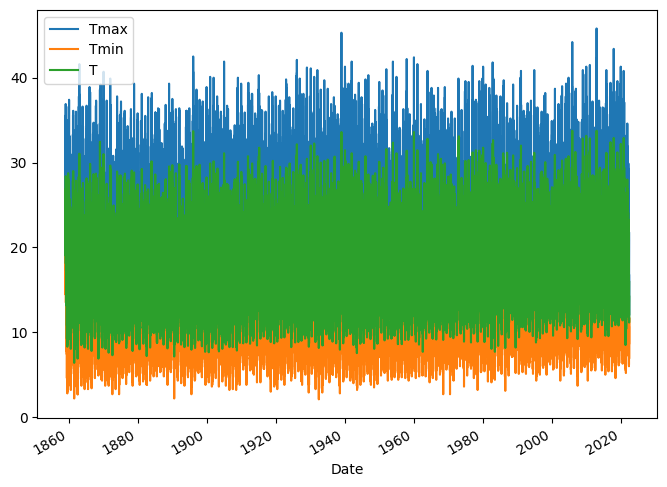

In [6]:
# timeseries plot - all data
temps[:].plot(figsize=(8,6))
plt.show()

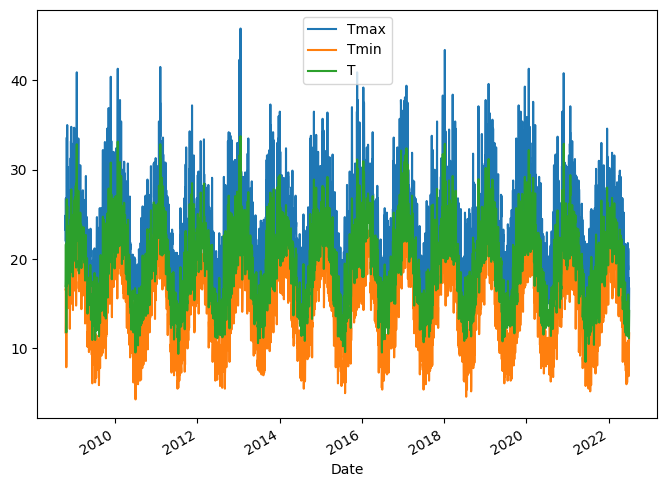

In [7]:
# timeseries plot - ~14 years
temps[-5000:].plot(figsize=(8,6))
plt.show()

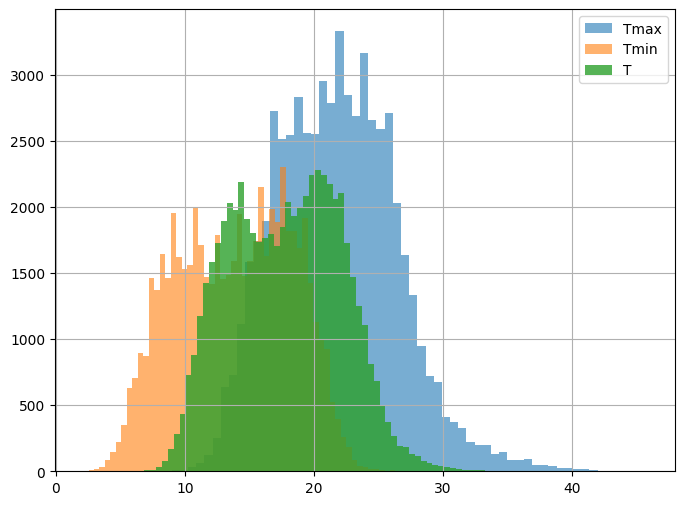

In [8]:
#temperature distributions in histogram
plt.figure(figsize=(8,6))
temps.Tmax.hist(bins=60, alpha=0.6, label='Tmax')
temps.Tmin.hist(bins=60, alpha=0.6, label='Tmin')
temps['T'].hist(bins=60, alpha=0.8, label='T')
plt.legend()
plt.show()

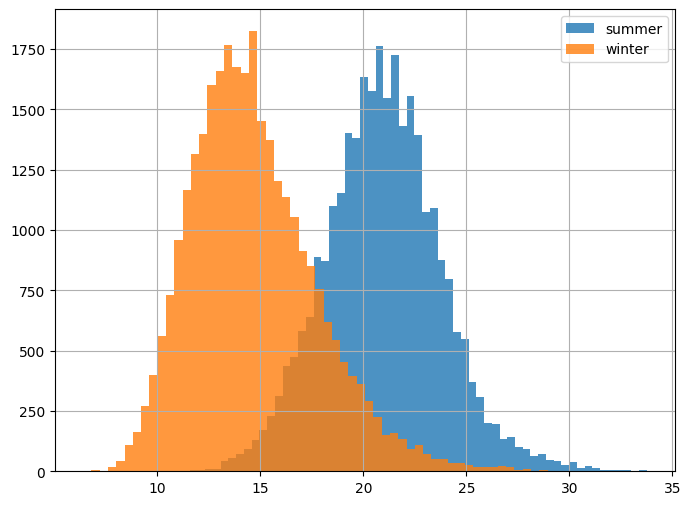

In [9]:
plt.figure(figsize=(8,6))
temps_season[temps_season['summer'] == 1]['T'].hist(bins=60, alpha=0.8, label='summer')
temps_season[temps_season['winter'] == 1]['T'].hist(bins=60, alpha=0.8, label='winter')
plt.legend()
plt.show()

In [11]:
date_list = temps.index.tolist()
mth_temps = pd.DataFrame(data=date_list, index=date_list).resample('MS')[0].agg([min, max])
mth_temps['month'] = mth_temps.index.month

In [12]:
mth_temps

,min,max,month
1859-01-01,1859-01-01,1859-01-31,1
1859-02-01,1859-02-01,1859-02-28,2
1859-03-01,1859-03-01,1859-03-31,3
1859-04-01,1859-04-01,1859-04-30,4
1859-05-01,1859-05-01,1859-05-31,5
...,...,...,...
2022-03-01,2022-03-01,2022-03-31,3
2022-04-01,2022-04-01,2022-04-30,4
2022-05-01,2022-05-01,2022-05-31,5
2022-06-01,2022-06-01,2022-06-30,6


In [13]:
def min_max_temps(row):
    stats = temps[(temps.index >= row['min']) & (temps.index <= row['max'])].agg([min, max])
    row['Tmax_max'] = stats.loc['max', 'Tmax']
    row['Tmax_min'] = stats.loc['min', 'Tmax']
    row['Tmin_max'] = stats.loc['max', 'Tmin']
    row['Tmin_min'] = stats.loc['min', 'Tmin']
    row['T_max'] = stats.loc['max', 'T']
    row['T_min'] = stats.loc['min', 'T']
    return row

mth_temps = mth_temps.apply(min_max_temps,axis=1)
mth_temps

,min,max,month,Tmax_max,Tmax_min,Tmin_max,Tmin_min,T_max,T_min
1859-01-01,1859-01-01,1859-01-31,1,36.9,20.6,19.9,14.5,28.40,18.10
1859-02-01,1859-02-01,1859-02-28,2,35.6,19.9,20.0,13.3,26.95,17.25
1859-03-01,1859-03-01,1859-03-31,3,30.4,18.8,18.9,13.3,23.55,17.10
1859-04-01,1859-04-01,1859-04-30,4,31.1,16.8,17.7,7.8,22.45,13.25
1859-05-01,1859-05-01,1859-05-31,5,28.6,13.9,16.7,4.6,22.65,9.25
...,...,...,...,...,...,...,...,...,...
2022-03-01,2022-03-01,2022-03-31,3,28.6,21.5,21.4,15.1,24.45,19.50
2022-04-01,2022-04-01,2022-04-30,4,29.9,18.2,17.9,13.1,23.30,15.90
2022-05-01,2022-05-01,2022-05-31,5,26.8,14.9,18.2,8.2,21.45,12.05
2022-06-01,2022-06-01,2022-06-30,6,21.8,15.0,10.9,6.0,16.05,11.30


In [24]:
grouped_mths = mth_temps.groupby(mth_temps.month)[['Tmax_max', 'Tmax_min', 'Tmin_max', 'Tmin_min','T_max','T_min']].agg([min, max])
grouped_mths['months'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
grouped_mths = grouped_mths.set_index('months')

In [25]:
grouped_mths[[('Tmax_max', 'max'),('Tmin_min', 'min'),('Tmax_min', 'min'),('Tmin_max', 'max')]]

,Tmax_max,Tmin_min,Tmax_min,Tmin_max
,max,min,min,max
months,,,,
Jan,45.8,10.6,17.2,26.2
Feb,42.1,9.6,15.6,27.6
Mar,39.8,9.3,16.2,25.4
Apr,35.4,7.0,13.8,24.3
May,30.0,4.4,11.3,20.8
Jun,26.9,2.1,9.7,18.4
Jul,26.5,2.2,7.7,18.1
Aug,31.3,2.7,9.1,19.7


In [26]:
grouped_mths[[('T_max', 'max'),('T_max', 'min'),('T_min', 'max'),('T_min', 'min')]]

T_max         T_min       
          max    min    max    min
months                            
Jan     33.75  22.75  21.95  15.05
Feb     33.10  23.20  21.95  12.60
Mar     31.75  22.15  20.65  13.10
Apr     29.10  19.45  18.20  11.20
May     24.55  16.20  14.95   9.20
Jun     21.60  13.25  12.90   7.80
Jul     20.90  12.35  12.50   6.40
Aug     25.05  14.45  12.45   7.30
Sep     26.90  17.25  15.25   7.85
Oct     30.55  19.05  17.50   9.90
Nov     32.90  20.40  18.35  12.45
Dec     32.60  22.05  20.40  14.00

# 3. Time Series Decomposition and Modelling

De-trend  and remove seasonality using statsmodels decompose function classical decomposition using moving average

Classical decomposition: Additive Decomposition

Trend: T; Seasonality: S, Noise:e

$$ y_t = T_t + S_t + e_t $$


In [27]:
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order, AutoRegResults

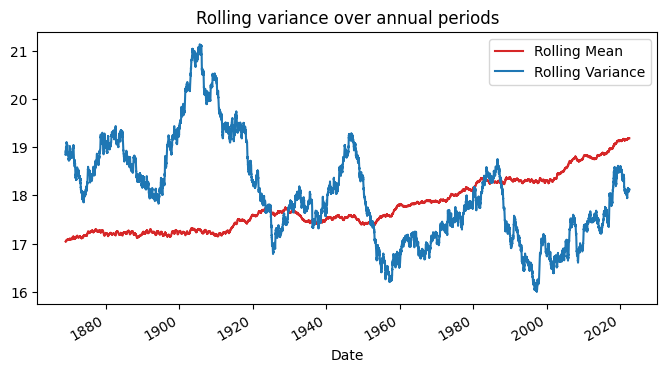

In [30]:
temps.sort_index(inplace=True)
temps['T'].rolling(window = 365*10).mean().plot(figsize=(8,4), color="tab:red", title="Rolling mean over annual periods")
temps['T'].rolling(window = 365*10).var().plot(figsize=(8,4), color="tab:blue", title="Rolling variance over annual periods");
# add legend
plt.legend(['Rolling Mean', 'Rolling Variance'])

#### Use seasonal decompose function

In [32]:
temps['T']

Date
1859-01-01    19.45
1859-01-02    20.05
1859-01-03    19.75
1859-01-04    21.05
1859-01-05    20.75
              ...  
2022-06-29    12.95
2022-06-30    13.55
2022-07-01    11.15
2022-07-02    13.30
2022-07-03    14.20
Name: T, Length: 59557, dtype: float64

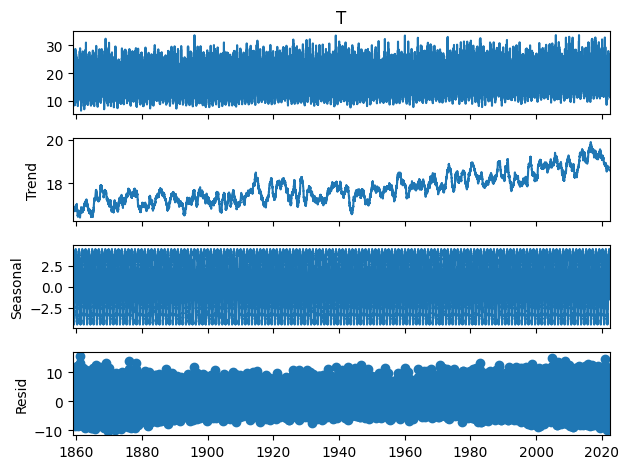

(-15.0, 15.0)

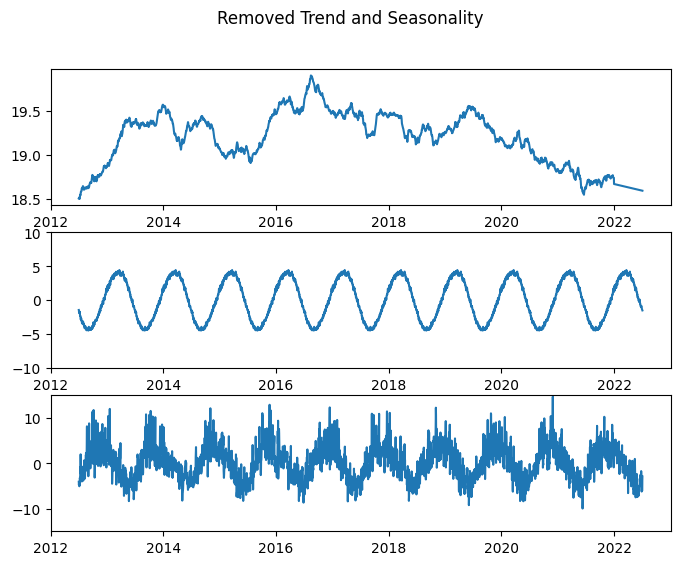

In [33]:
decompose_result = seasonal_decompose(temps['T'], model='additive', period=int(365), extrapolate_trend='freq')

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

### Visualise All Data
decompose_result.plot()
plt.show()

### Visualise 10 years
years_examine = 365*10
fig, axs = plt.subplots(3, figsize=(8,6))
fig.suptitle('Removed Trend and Seasonality')
axs[0].plot(trend[-years_examine:])
axs[1].plot(seasonal[-years_examine:])
axs[1].set_ylim([-10,10])
axs[2].plot(residual[-years_examine:])
axs[2].set_ylim([-15,15])

In [35]:
dftest = adfuller(residual, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -20.710886091813666
2. P-Value :  0.0
3. Num Of Lags :  60
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 59496
5. Critical Values :
	 1% :  -3.4304599163331826
	 5% :  -2.861588580932765
	 10% :  -2.5667958579940375


1. ADF < 0, reject null of unit root (A unit root indicates non-stationarity), so the residual is stationary
1. A low p-value (typically < 0.05) suggests that reject the null hypothesis and conclude that the series is stationary.
1. Critical Values, are thresholds for the test statistic at the 1%, 5%, and 10% levels. If the ADF statistic is lower than the critical value at the 5% level, you can say with 95% confidence that the series is stationary

<Axes: >

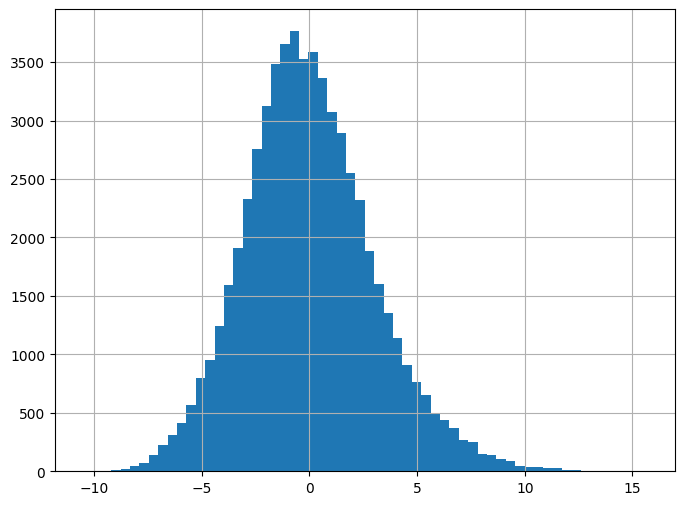

In [36]:
residual.hist(bins=60, figsize=(8,6))

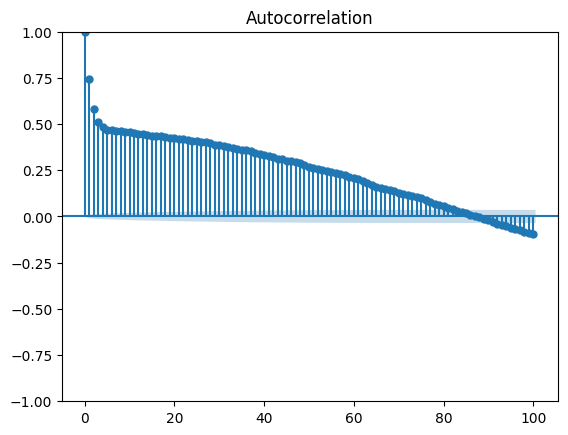

In [37]:
plot_acf(residual, lags=100)
plt.show()

1. Given the observation of significant serial correlation in the autocorrelation function (ACF) plot that does not vanish after a finite number of lags, it suggests that the data exhibits long-term dependency. This scenario is common in time series data, especially those with trends or seasonality that have not been fully accounted for or in series that inherently display long memory characteristics.
2. When the autocorrelation function (ACF) does not vanish after a finite number of lags and instead shows a slow decay, this typically indicates a process that is not well-modeled by a simple Moving Average (MA) model: Long Memory Process; Autoregressive (AR) Components: The presence of a slow decay in the ACF often suggests that the time series might be better modeled with autoregressive components, where current values are a function of past values. 

#### Determine AR order using PACF and AIC

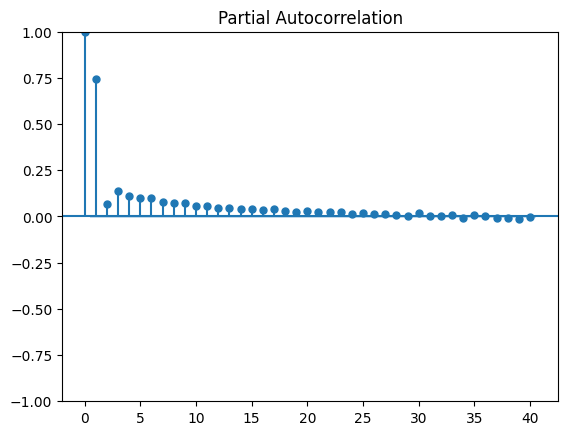

In [38]:
plot_pacf(residual, lags=40)
plt.show()

/Users/xiaozhezhang/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/ar_model.py:2108: FutureWarning: old_names will be removed after the 0.14 release. You should stop setting this parameter and use the new names.
  full_mod = AutoReg(
/Users/xiaozhezhang/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/ar_model.py:2185: FutureWarning: old_names will be removed after the 0.14 release. You should stop setting this parameter and use the new names.
  mod = AutoReg(


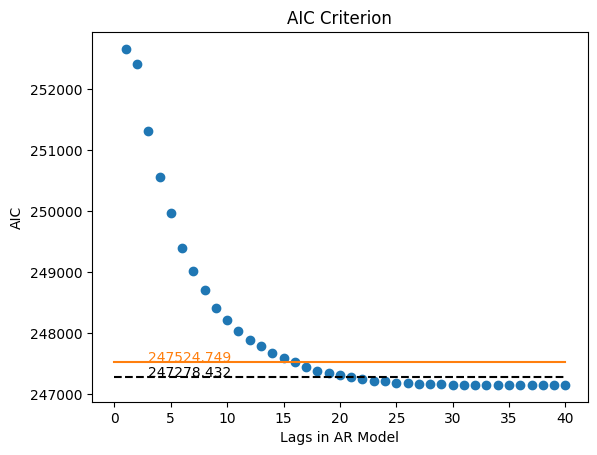

In [39]:
residuals = residual.copy(deep=True)
residuals.index = pd.DatetimeIndex(residuals.index).to_period('D')

mod = ar_select_order(residuals, maxlag=40, ic='aic', old_names=True)

aic = []
for key, val in mod.aic.items():
    if key != 0:
        aic.append((key[-1], val))

aic.sort()    
x,y = [x for x,y in aic],[y for x,y in aic]

plt.scatter(x, y)
plt.plot([0,40],[y[15],y[15]], 'tab:orange')
plt.text(3,y[15]+0.002, '{0}'.format(round(y[15],3)),color='tab:orange')
plt.plot([0,40],[y[20],y[20]], 'k--')
plt.text(3,y[20]-0.004, '{0}'.format(round(y[20],3)))
plt.title("AIC Criterion")
plt.xlabel("Lags in AR Model")
plt.ylabel("AIC")
plt.show()

/var/folders/57/dq27lfpd1zb7kzzggckgkm2h0000gn/T/ipykernel_75894/3450148202.py:1: FutureWarning: old_names will be removed after the 0.14 release. You should stop setting this parameter and use the new names.
  model = AutoReg(residuals, lags=15, old_names=True,trend='n')


                            AutoReg Model Results                             
Dep. Variable:                  resid   No. Observations:                59557
Model:                    AutoReg(15)   Log Likelihood             -123832.810
Method:               Conditional MLE   S.D. of innovations              1.936
Date:                Mon, 22 Apr 2024   AIC                         247697.619
Time:                        21:51:48   BIC                         247841.530
Sample:                    01-16-1859   HQIC                        247742.336
                         - 07-03-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
resid.L1       0.6139      0.004    149.905      0.000       0.606       0.622
resid.L2      -0.0515      0.005    -10.712      0.000      -0.061      -0.042
resid.L3       0.0360      0.005      7.494      0.0

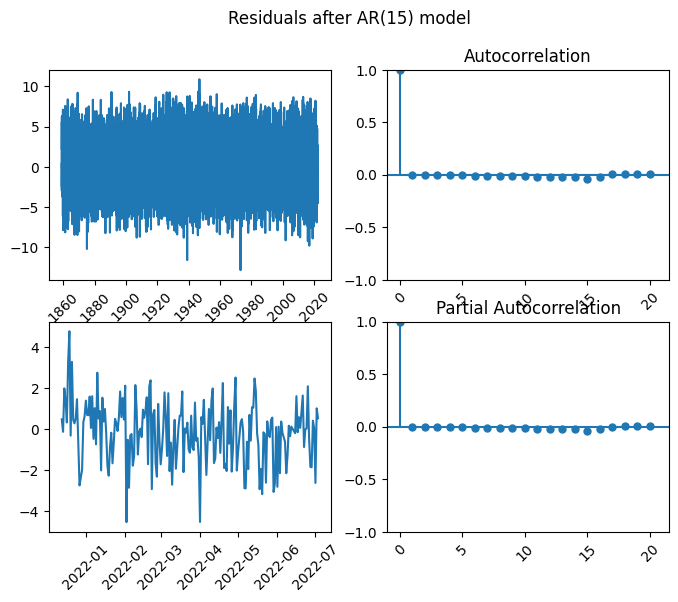

In [42]:
model = AutoReg(residuals, lags=15, old_names=True,trend='n')
model_fit  = model.fit()
coef = model_fit.params
res = model_fit.resid
res.index = res.index.to_timestamp()
print(model_fit.summary())

fig, axs = plt.subplots(2,2, figsize=(8,6))
fig.suptitle('Residuals after AR(15) model')
axs[0,0].plot(res)
axs[1,0].plot(res[-200:])
plot_acf(res, lags=20, ax=axs[0,1])
plot_pacf(res, lags=20, ax=axs[1,1])

# Rotate x-axis labels to 45 degrees for better readability
for ax in axs.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.show()

1. The top left plot (axs[0,0]) displays the residuals over time.
2. The bottom left plot (axs[1,0]) shows a zoomed-in view of the last 200 residuals, providing a closer look at the model's performance in the most recent period.
3. The top right plot (axs[0,1]) is the autocorrelation function (ACF) plot for the residuals, showing the correlation of the residuals with their own lagged values up to 20 lags. This helps in identifying any autocorrelation pattern that might still exist.
4. The bottom right plot (axs[1,1]) is the partial autocorrelation function (PACF) plot for the residuals, also up to 20 lags. PACF helps in identifying the direct effect of past values on the current value, excluding effects explained by their mutual correlation with intervening values.

From the ACF plot, the autocorrelation quickly drop off to zero after lag0, meaing that the residuals are close to white noise, indicating a good fit of the model to the data.

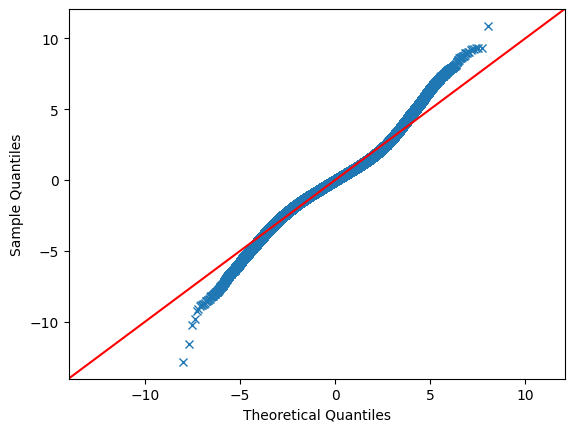

In [43]:
from scipy.stats import norm
qqplot(res, marker='x', dist=norm, loc=0, scale=np.std(res), line='45')
plt.show()

# 4. De-trending and modelling seasonal variation with Fourier Series

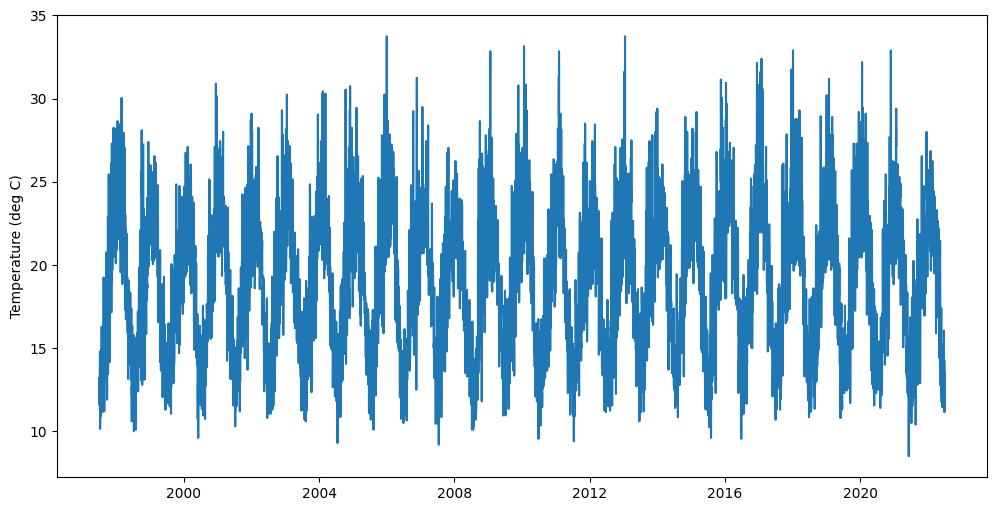

In [44]:
import os 
import numpy as np
import pandas as pd
import datetime as dt
from scipy import signal
import matplotlib.pyplot as plt

lookback = 365*25
fig = plt.figure(figsize=(12,6))
plt.plot(temps['T'][-lookback:])
plt.ylabel('Temperature (deg C)')
plt.show()

#### Denoised Series

Using Convolution, a mathematical operation which generates a new functions that is a function of two prior functions, meaning the convolution is the area under the curve of two functions which are move towards and away from one another

Convolution is used frequently in the signal processing industry

Why denoise series? 
- Preprocessing for improving model accuracy, enhance interpretability, stabilize variance, improve forecasting performance

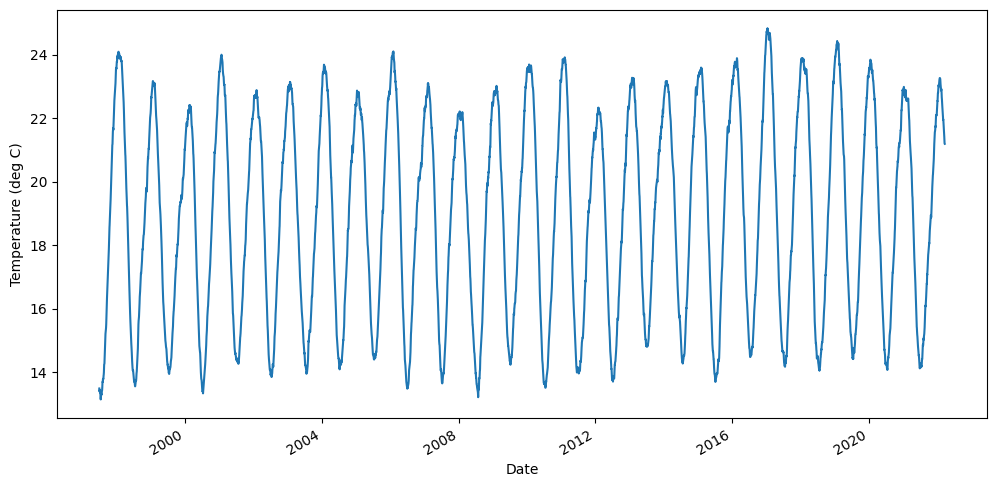

In [52]:
def apply_convolution(x, window):
    '''
    x: pandas series, input series
    window: int, window size for convolution, how many adjacent values to consider for smoothing a point
    '''
    conv = np.repeat([0., 1., 0.], window)
    filtered = signal.convolve(x, conv, mode='same') / window
    return filtered

denoised = temps.apply(lambda x: apply_convolution(x, 90))

denoised['T'][-lookback:-100].plot(figsize=(12,6))
plt.ylabel('Temperature (deg C)')
plt.show()

In [48]:
temps.head()

,Tmax,Tmin,T
Date,,,
1859-01-01,24.4,14.5,19.45
1859-01-02,24.4,15.7,20.05
1859-01-03,24.2,15.3,19.75
1859-01-04,24.7,17.4,21.05
1859-01-05,24.6,16.9,20.75


In [49]:
denoised.head()

,Tmax,Tmin,T
Date,,,
1859-01-01,13.063333,8.600000,10.831667
1859-01-02,13.357778,8.812222,11.085000
1859-01-03,13.605556,9.014444,11.310000
1859-01-04,13.832222,9.177778,11.505000
1859-01-05,14.053333,9.340000,11.696667


$$ \bar{T}_t = T_{\text{trend}} + T_{\text{seasonal}} $$


assuming linear trend

$$ T_{\text{trend}} = T_{\text{linear}} = a + bt $$


#### Long Term Trend

Moving Average (MA) as the Trend

<Axes: title={'center': 'Rolling mean over annual periods'}, xlabel='Date', ylabel='Temperature (deg C)'>

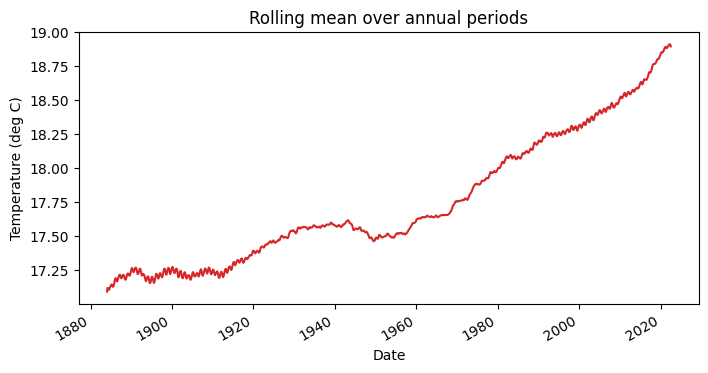

In [54]:
denoised['MA'] = denoised['T'].rolling(window = lookback).mean()
plt.ylabel('Temperature (deg C)')
denoised['MA'].plot(figsize=(8,4), color="tab:red", title="Rolling mean over annual periods")

#### Seasonal Variation

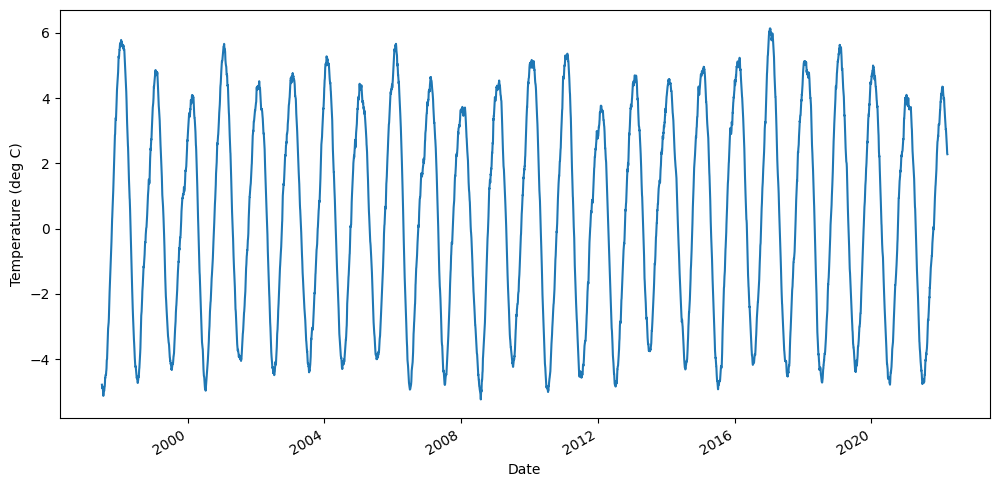

In [55]:
denoised['S'] = denoised['T'] - denoised['MA']
denoised['S'][-lookback:-100].plot(figsize=(12,6))
plt.ylabel('Temperature (deg C)')
plt.show()

#### Model Seasonal Variation using Fourier Series

Fourier Series: A Fourier series is an expansion of a periodic function f(x) in terms of an infinite sum of sines and cosines. Fourier Series makes use of the orthogonality relationships of the sine and cosine functions.

$$ T_{\text{seasonal}} = a_0 + \sum_{i} \alpha_i \sin(iw_1t + \theta ) + \sum_{i}\beta_i \cos(iw_2t  + \phi) $$

Many paper suggest the the temperature seasonal variation can be captured by first order Fourier Series

$$ T_{\text{seasonal}} = \alpha \sin(wt + \theta ) + \beta \cos(wt  + \phi) $$

Or single sine

$$ T_{\text{seasonal}} = \alpha \sin(wt + \theta ) $$


Notice that we assume: a0 will be captured in the trend component, the speeds of the seasonal processes are the same at 𝜔=2𝜋/365 



Compare two models:
$$ \bar{T}_t = a + bt + \alpha \sin(wt + \theta ) + \beta \cos(wt  + \phi) $$


$$ \bar{T}_t = a + bt + \alpha \sin(wt + \theta ) $$



In [82]:
from scipy.stats import norm
from scipy.optimize import curve_fit

temp_t = temps['T'].copy(deep=True)
temp_t = temp_t.to_frame()

def model_fit_general(x, a, b, a1, b1, theta, phi):
    omega = 2*np.pi/365 #365.25
    y_pred = a + b*x + a1*np.cos(omega*x + theta) + b1*np.sin(omega*x + phi)
    return y_pred

def model_fit(x, a, b, a1, b1):
    omega = 2*np.pi/365 #365.25
    y_pred = a + b*x + a1*np.cos(omega*x) + b1*np.sin(omega*x)
    return y_pred

def RSS(y, y_pred):
    return np.sqrt( (y - y_pred)**2 ).sum()

In [83]:
if isinstance(temp_t.index , pd.DatetimeIndex):
    first_ord = temp_t.index.map(dt.datetime.toordinal)[0]
    temp_t.index=temp_t.index.map(dt.datetime.toordinal)
    
params, cov = curve_fit(model_fit, xdata = temp_t.index-first_ord, ydata = temp_t['T'], method='lm')

param_list = ['a', 'b', 'a1', 'b1']

print('\n Model 1 \n') 
std_dev = np.sqrt(np.diag(cov))
for name, p, sd in zip( param_list, params, std_dev):
    print('{0} :  {1:0.3}  CI ~normally [{2:0.2e},{3:0.2e}]'.format(name, p, p-1.96*sd,p+1.96*sd))

temp_t['model_fit'] = model_fit(temp_t.index-first_ord, *params)


 Model 1 

a :  16.8  CI ~normally [1.68e+01,1.68e+01]
b :  3.35e-05  CI ~normally [3.23e-05,3.46e-05]
a1 :  3.92  CI ~normally [3.89e+00,3.95e+00]
b1 :  3.0  CI ~normally [2.97e+00,3.02e+00]


In [84]:
if isinstance(temp_t.index , pd.DatetimeIndex):
    temp_t.index=temp_t.index.map(dt.datetime.toordinal)
params1, cov1 = curve_fit(model_fit_general, xdata = temp_t.index-first_ord, ydata = temp_t['T'], method='lm')

param_list = ['a', 'b', 'a1', 'b1', 'theta', 'phi']

print('\n Model 1 \n') 
std_dev = np.sqrt(np.diag(cov1))
for name, p, sd in zip( param_list, params1, std_dev):
    print('{0} :  {1:0.3}  CI ~normally [{2:0.2e},{3:0.2e}]'.format(name, p, p-1.96*sd,p+1.96*sd))

temp_t['model_fit_general'] = model_fit_general(temp_t.index-first_ord, *params1)


 Model 1 

a :  16.8  CI ~normally [1.68e+01,1.68e+01]
b :  3.35e-05  CI ~normally [3.23e-05,3.46e-05]
a1 :  -1.96e+02  CI ~normally [-4.03e+06,4.03e+06]
b1 :  1.99e+02  CI ~normally [-4.03e+06,4.03e+06]
theta :  1.05e+02  CI ~normally [-4.01e+03,4.22e+03]
phi :  2.2e+02  CI ~normally [-3.83e+03,4.27e+03]


Residual Sum of Squares (RSS)
  RSS model generalised: 112295.88
  RSS model sine curve : 112295.89


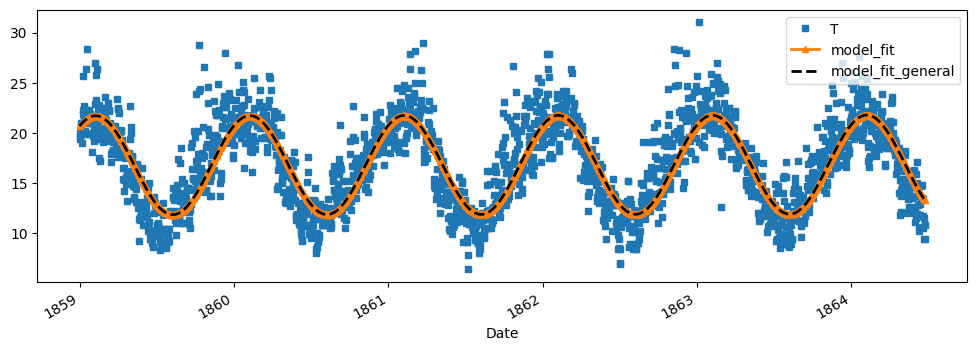

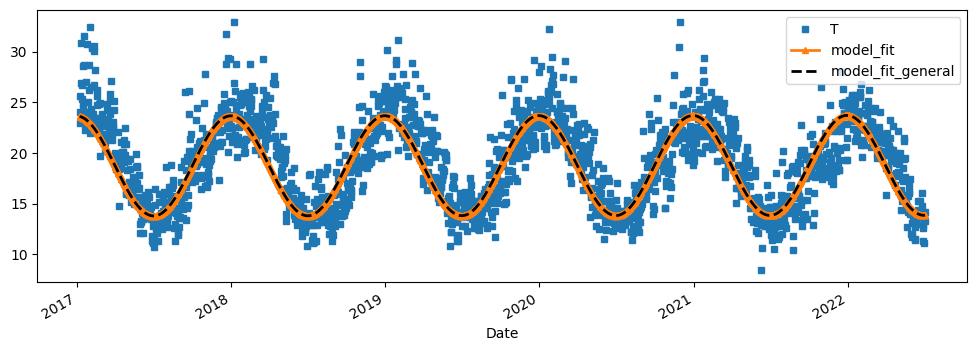

In [85]:
if not isinstance(temp_t.index , pd.DatetimeIndex):
    temp_t.index=temp_t.index.map(dt.datetime.fromordinal)

temp_t[:2000].plot(figsize=(12,4), style=['s','^-','k--'] , markersize=4, linewidth=2 )
temp_t[-2000:].plot(figsize=(12,4), style=['s','^-','k--'] , markersize=4, linewidth=2 )

RSS(temp_t['T'], temp_t['model_fit_general'])
print('Residual Sum of Squares (RSS)')
print('  RSS model generalised:', round(RSS(temp_t['T'], temp_t['model_fit_general']),2))
print('  RSS model sine curve :', round(RSS(temp_t['T'], temp_t['model_fit']),2))

Both model are equivlent, using the simple one of model_fit, there is issue with leading and lagging phase shifts between the 160 year intervals. Usually use 365.25 instead of 365 accounting for leap years.
𝜔=2𝜋/365.25

Parameters:
     a 16.8
     b 3.32e-05
 alpha 5.05
 theta 1.27


<Axes: xlabel='Date'>

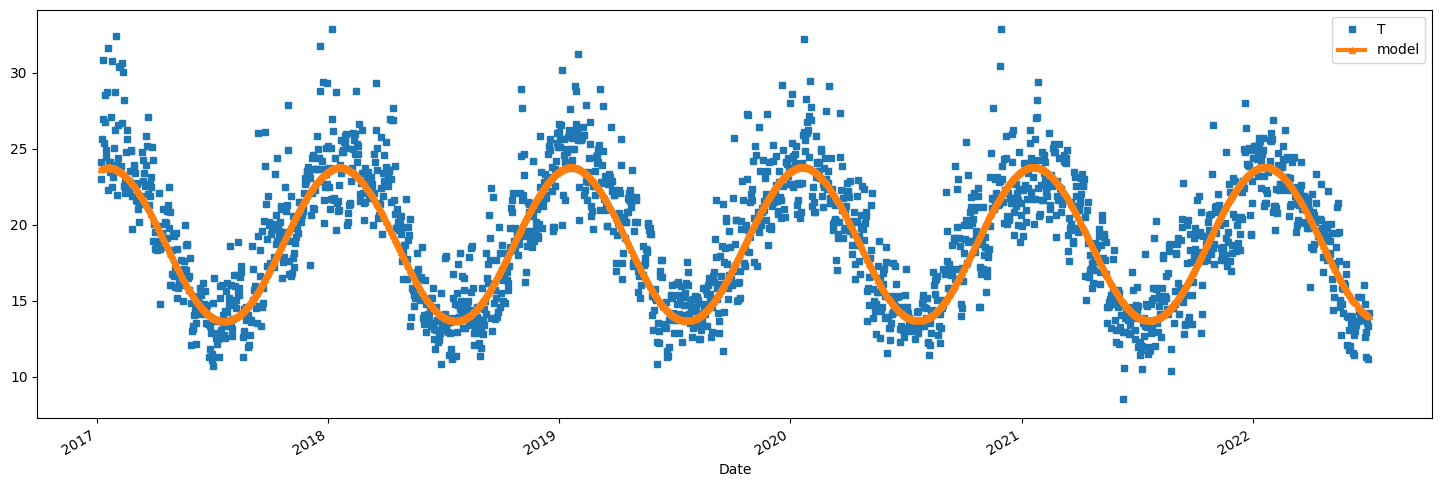

In [86]:
temp_t = temps['T'].copy(deep=True)
temp_t = temp_t.to_frame()

def model(x, params):
    a,b,a1,b1 = params
    omega = 2*np.pi/365.25 #365.25
    theta = np.arctan(a1/b1)
    alpha = np.sqrt( a1**2 + b1**2)   
    print('Parameters:\n     a {0:0.3}\n     b {1:0.3}\n alpha {2:0.3}\n theta {3:0.3}'.format(a,b,alpha,theta))
    y_pred = a + b*x + alpha*np.sin(omega*x + theta)
    return y_pred

def model_fit(x, a, b, a1, b1):
    omega = 2*np.pi/365.25
    y_pred = a + b*x + a1*np.cos(omega*x) + b1*np.sin(omega*x)
    return y_pred

if isinstance(temp_t.index , pd.DatetimeIndex):
    first_ord = temp_t.index.map(dt.datetime.toordinal)[0]
    temp_t.index=temp_t.index.map(dt.datetime.toordinal)
    
params_all, cov = curve_fit(model_fit, xdata = temp_t.index-first_ord, ydata = temp_t['T'], method='lm')
    
temp_t['model'] = model(temp_t.index-first_ord, params_all)

if not isinstance(temp_t.index , pd.DatetimeIndex):
    temp_t.index=temp_t.index.map(dt.datetime.fromordinal)
    
temp_t[-2000:].plot(figsize=(18,6), style=['s','^-','k-'] , markersize=4, linewidth=3)

#### Residual of the model

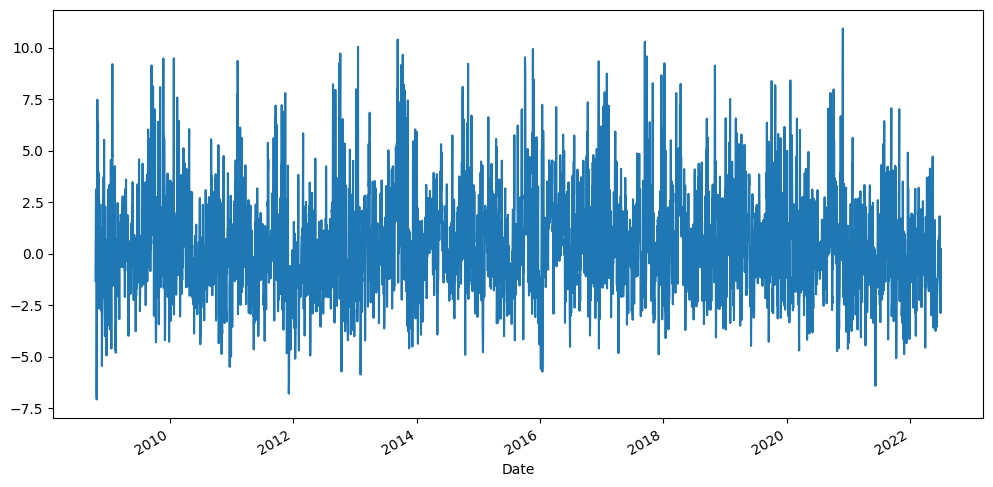

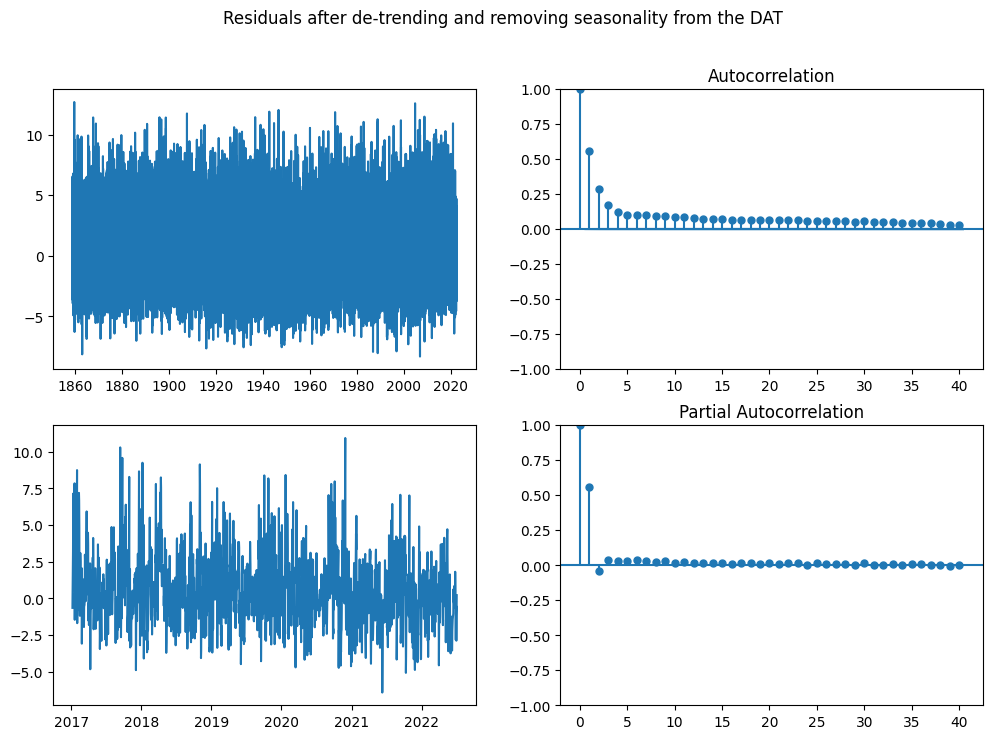

In [89]:
if not isinstance(temp_t.index , pd.DatetimeIndex):
    temp_t.index=temp_t.index.map(dt.datetime.fromordinal)

temp_t['res'] = temp_t['T']-temp_t['model']
temp_t['res'][-5000:].plot(figsize=(12,6))
plt.show()

fig, axs = plt.subplots(2,2, figsize=(12,8))
fig.suptitle('Residuals after de-trending and removing seasonality from the DAT')
axs[0,0].plot(temp_t['res'])
axs[1,0].plot(temp_t['res'][-2000:])
plot_acf(temp_t['res'], lags=40, ax=axs[0,1])
plot_pacf(temp_t['res'], lags=40, ax=axs[1,1])
plt.show()

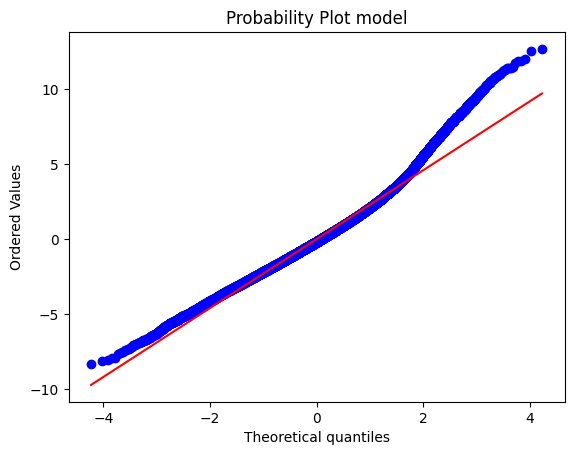

P(Z > 2): 3.59% vs Normal Distibution: 2.28% 
SKEW    : 0.629
KURTOSIS: 4.23


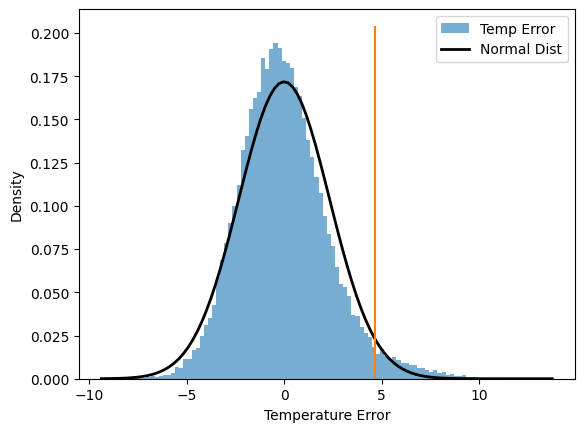

In [90]:
import scipy.stats as stats
stats.probplot(temp_t['res'], dist="norm", plot=plt)
plt.title("Probability Plot model")
plt.show()

mu, std = norm.fit(temp_t['res'])
z = (temp_t['res'] - mu)/std
plt.hist(temp_t['res'], density=True, alpha=0.6, bins=100, label='Temp Error')

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
data = np.random.randn(100000)

plt.plot(x, p, 'k', linewidth=2, label='Normal Dist')
plt.plot([std*2,std*2],[0,ymax])

print('P(Z > 2): {:0.3}% vs Normal Distibution: {:0.3}% '.format(len(z[z >= 2])/len(z)*100, (1-norm.cdf(2))*100))
print('SKEW    : {:0.3}'.format(stats.skew(z)))
print('KURTOSIS: {:0.3}'.format(stats.kurtosis(z)+3))
plt.ylabel('Density')
plt.xlabel('Temperature Error')
plt.legend()
plt.show()

# 6. Modelling Temperature with a modified Ornstein-Uhlenbeck process

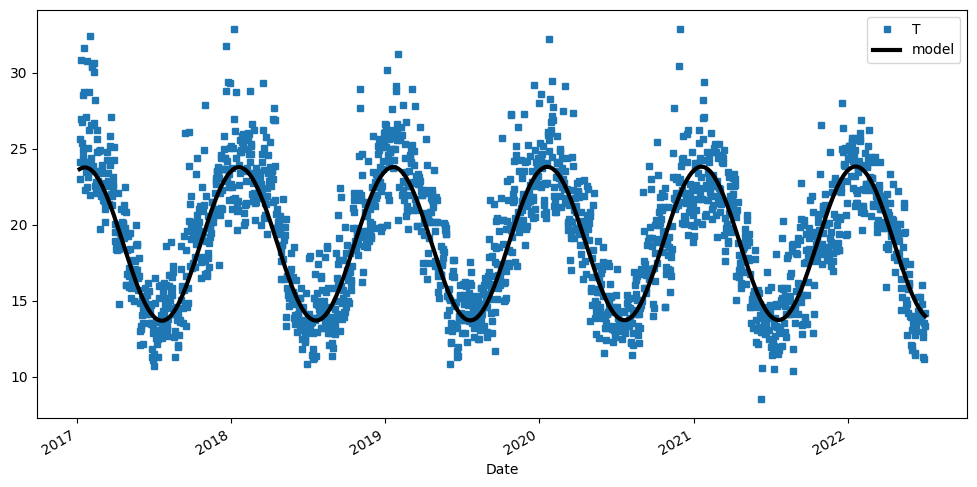

In [92]:
temp_t[['T','model']][-2000:].plot(figsize=(12,6), style=['s','k-'] , markersize=4, linewidth=3 )
plt.show()

#### Model Residual Using Mean-Reverting Continuous stochastic process

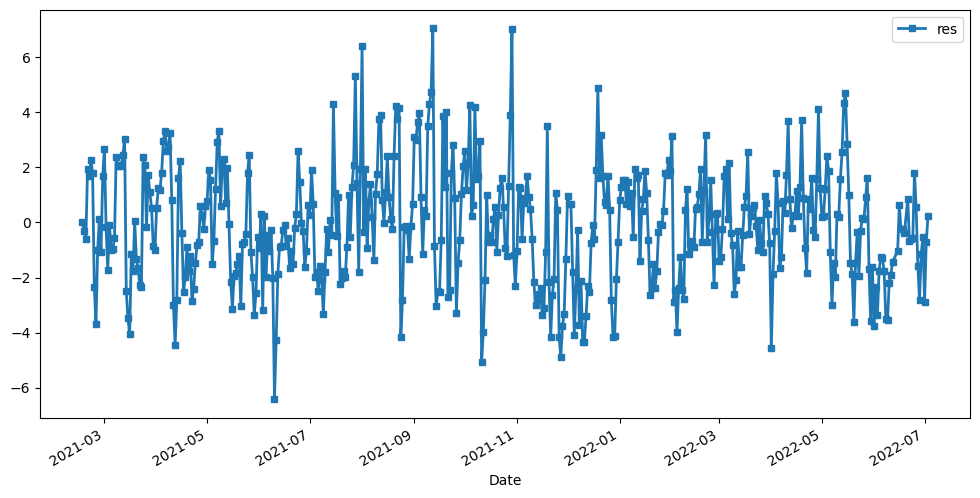

In [93]:
temp_t[['res']][-500:].plot(figsize=(12,6), style=['s-'] , markersize=4, linewidth=2 )
plt.show()

Estimating Speed of Mean Reversion

$$ d T_t = \left[ \frac{d\bar{T}_t}{dt} + \kappa(\bar{T}_t - T_t) \right] dt + \sigma_t dW_t $$


In [94]:
residuals = temp_t['res']
residuals.index = pd.DatetimeIndex(residuals.index).to_period('D')

model = AutoReg(residuals, lags=1, old_names=True, trend='n')
model_fit  = model.fit()
coef = model_fit.params
res = model_fit.resid
# res.index = res.index.to_timestamp()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                    res   No. Observations:                59557
Model:                     AutoReg(1)   Log Likelihood             -123373.258
Method:               Conditional MLE   S.D. of innovations              1.921
Date:                Tue, 23 Apr 2024   AIC                         246750.516
Time:                        10:35:51   BIC                         246768.506
Sample:                    01-02-1859   HQIC                        246756.106
                         - 07-03-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
res.L1         0.5617      0.003    165.700      0.000       0.555       0.568
                                    Roots                                    
                  Real          Imaginary           M

/var/folders/57/dq27lfpd1zb7kzzggckgkm2h0000gn/T/ipykernel_75894/365860394.py:4: FutureWarning: old_names will be removed after the 0.14 release. You should stop setting this parameter and use the new names.
  model = AutoReg(residuals, lags=1, old_names=True, trend='n')


- The parameter $\kappa$ represents the speed of mean reversion in the model. 
- The output of model_fit.summary() includes various statistics about the fitted model, among which is the coefficient for the lagged variable, often denoted as res.L1 in the summary table. The coef of 0.5617 for res.L1 refers to the coefficient of the first lag of the residuals in the autoregressive model. This value quantifies the relationship between the current value of the residuals and its immediate past value.
It can be converted to the level of mean reversion $\kappa$ for the OU process.



$$ \hat{T}_t = \gamma \hat{T}_{t-1} + e_i $$



$$ \kappa = 1 - \gamma = 1 - 0.5617$$

Temperature Process:
$$ d T_t = \left[ \frac{d\bar{T}_t}{dt} + 0.438(\bar{T}_t - T_t) \right] dt + \sigma_t dW_t $$

$$  \bar{T}_t = 16.8 + (3.32e05)t + 5.05 \sin\left(\frac{2\pi}{365.25} t + 1.27\right) $$
First Order:
$$ \bar{T}'_t = (3.32e05) + 5.05 (\frac{2\pi}{365.25}) cos\left((\frac{2\pi}{365.25})t + 1.27\right) $$

# 7. Temperature Volatility Models

$$ \hat{\sigma}_t = \sqrt{\frac{1}{N_t} \sum_{i=0}^{N-1} (T_{i+1} - T_i)^2} $$

$\sigma_t$  is the dynamic volatility of the Temperature process. This could be both daily as with our temperature dynamics or seasonal, for example monthly.

In [104]:
temp_t['day'] = temp_t.index.dayofyear # day of year
temp_t['month'] = temp_t.index.month # month
temp_t['year'] = temp_t.index.year # year

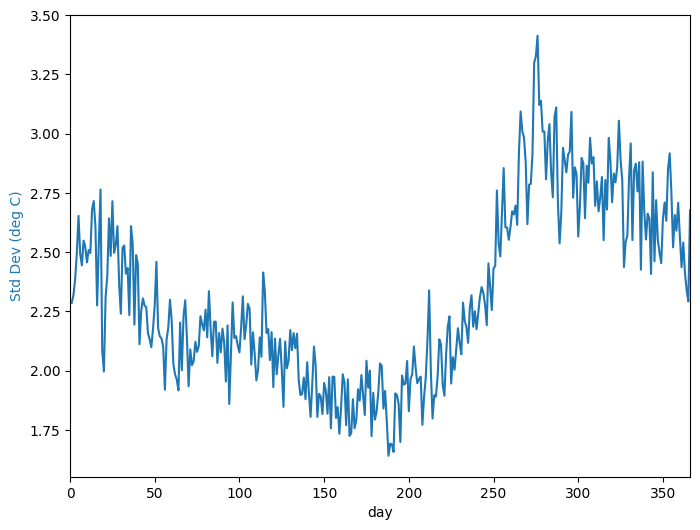

In [105]:
vol = temp_t.groupby(['day'])['T'].agg(['mean','std'])
vol['std'].plot(color='tab:blue', figsize=(8,6))
plt.ylabel('Std Dev (deg C)',color='tab:blue')
plt.xlim(0,366) 
plt.show()

Different ways to model temperature volatility across seasons:
1. Piece-wise constant functions, volatility for each season
1. Parametric Regression – Polynomial
1. Local and Nonparametric Regression – Splines
1. Fourier series to model the volatility of temperature
1. Stochastic differential equation

#### 1. Piece-wise constant functions, volatility for each season

In [114]:
vol_days

,mean,std,days,vol_mth
day,,,,
1,22.184356,2.286005,1,2.477773
2,22.271646,2.317942,2,2.477773
3,22.209756,2.383532,3,2.477773
4,22.375915,2.493215,4,2.477773
5,22.313190,2.652804,5,2.477773
...,...,...,...,...
362,21.859509,2.540436,362,2.641307
363,21.796914,2.413418,363,2.641307
364,21.883742,2.340643,364,2.641307


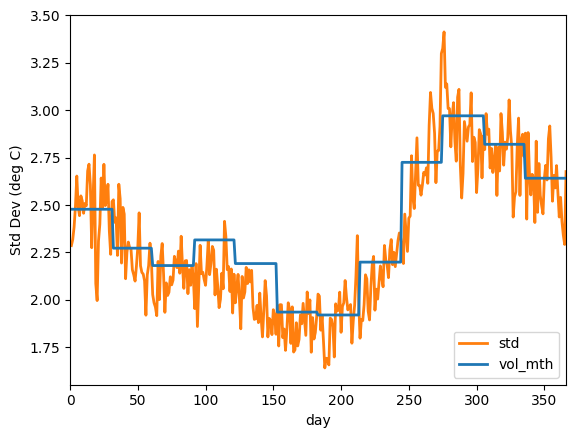

In [115]:
vol_days = temp_t.groupby(['day'])['T'].agg(['mean','std'])
vol_mths = temp_t.groupby(['month'])['T'].agg(['mean','std'])

vol_days["days"] = vol_days.index
def change_month(row):
    date = dt.datetime(2016, 1, 1) + dt.timedelta(row.days - 1)
    return vol_mths.loc[date.month,'std']

vol_days['vol_mth'] = vol_days.apply(change_month, axis=1)

vol_days[['std', 'vol_mth']].plot(color=['tab:orange','tab:blue'],linewidth=2)
plt.ylabel('Std Dev (deg C)')
plt.xlim(0,366) 
plt.legend(loc='lower right')
plt.show()

#### 2. Parametric Regression – Polynomial

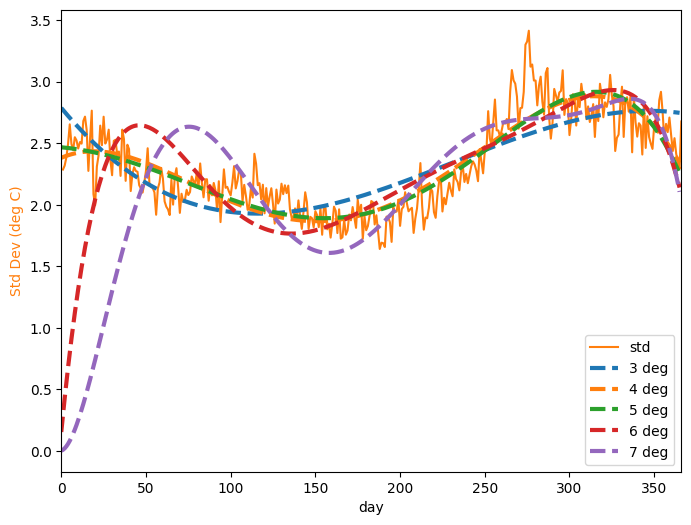

In [107]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Preprocess x, y combinations to handle dimensionality of Polynomial Features
x = np.array(vol['std'].index)
y = np.array(vol['std'].values)

#Create single dimension
x= x[:,np.newaxis]
y= y[:,np.newaxis]

inds = x.ravel().argsort()  # Sort x values and get index    
x = x.ravel()[inds].reshape(-1,1)
y = y[inds] #Sort y according to x sorted index

# initialise degrees of freedom
poly_feats3 = PolynomialFeatures(degree=3)
poly_feats4 = PolynomialFeatures(degree=4)
poly_feats5 = PolynomialFeatures(degree=5)
poly_feats6 = PolynomialFeatures(degree=6)
poly_feats7 = PolynomialFeatures(degree=7)

# Fit transform to number of polynomial features
xp3 = poly_feats3.fit_transform(x)
xp4 = poly_feats4.fit_transform(x)
xp5 = poly_feats5.fit_transform(x)
xp6 = poly_feats6.fit_transform(x)
xp7 = poly_feats7.fit_transform(x)

# Fit using ordinary least squares
p3 = sm.OLS(y, xp3).fit()
p4 = sm.OLS(y, xp4).fit()
p5 = sm.OLS(y, xp5).fit()
p6 = sm.OLS(y, xp6).fit()
p7 = sm.OLS(y, xp7).fit()

# Predict using original data and model fit
poly3 = p3.predict(xp3)
poly4 = p4.predict(xp4)
poly5 = p5.predict(xp5)
poly6 = p6.predict(xp6)
poly7 = p7.predict(xp7)

vol = temp_t.groupby(['day'])['T'].agg(['mean','std'])
vol['std'].plot(color='tab:orange', figsize=(8,6))
plt.plot(poly3, '--', linewidth=3, label='3 deg')
plt.plot(poly4, '--', linewidth=3, label='4 deg')
plt.plot(poly5, '--', linewidth=3, label='5 deg')
plt.plot(poly6, '--', linewidth=3, label='6 deg')
plt.plot(poly7, '--', linewidth=3, label='7 deg')
plt.ylabel('Std Dev (deg C)',color='tab:orange')
plt.xlim(0,366) 
plt.legend(loc='lower right')
plt.show()

Choose Model using AIC
$$ \text{AIC} = 2k - 2\ln(\hat{L}) $$

k: number of parameters

L_head: log-likelihood

In [109]:
p3.aic, p4.aic, p5.aic, p6.aic, p7.aic

(-40.448907214634914,
 -211.17126428705262,
 -217.5475285893657,
 398.1625231880456,
 728.2533876037703)

poly5 has the lowest AIC, use this as the best model

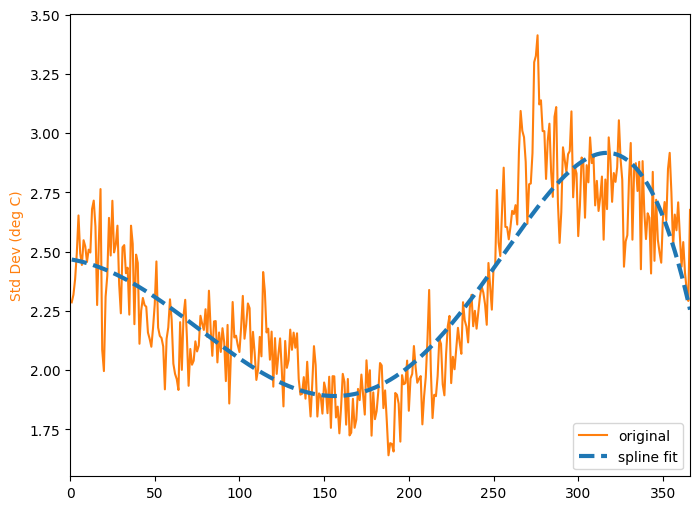

In [108]:
plt.figure(figsize=(8,6))
plt.plot(x, y, color='tab:orange', label='original')
plt.plot(x, poly5, '--', linewidth=3, label='spline fit')
plt.ylabel('Std Dev (deg C)',color='tab:orange')
plt.xlim(0,366) 
plt.legend(loc='lower right')
plt.show()

#### 3. Local and Nonparametric Regression – Splines

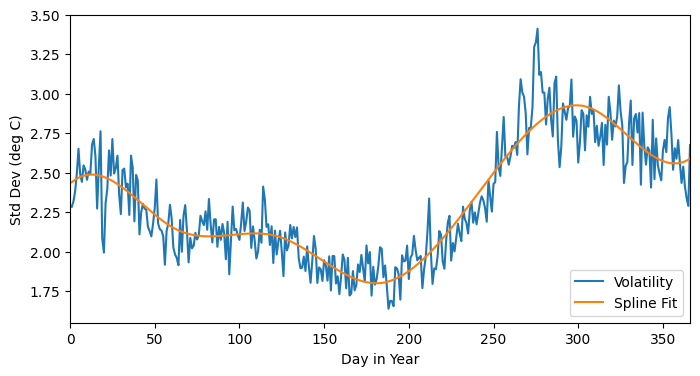

In [112]:
from scipy import interpolate

x = np.array(vol['std'].index)
y = np.array(vol['std'].values)

knot_numbers = 5
x_new = np.linspace(0, 1, knot_numbers+2)[1:-1]
q_knots = np.quantile(x, x_new) 
t,c,k = interpolate.splrep(x, y, t=q_knots, s=1)
yfit = interpolate.BSpline(t,c,k)(x) 

plt.figure(figsize=(8,4))
plt.plot(x, y, label='Volatility')
plt.plot(x, yfit, label='Spline Fit')
plt.ylabel('Std Dev (deg C)')
plt.xlabel('Day in Year')
plt.xlim(0,366) 
plt.legend(loc='lower right')
plt.show()

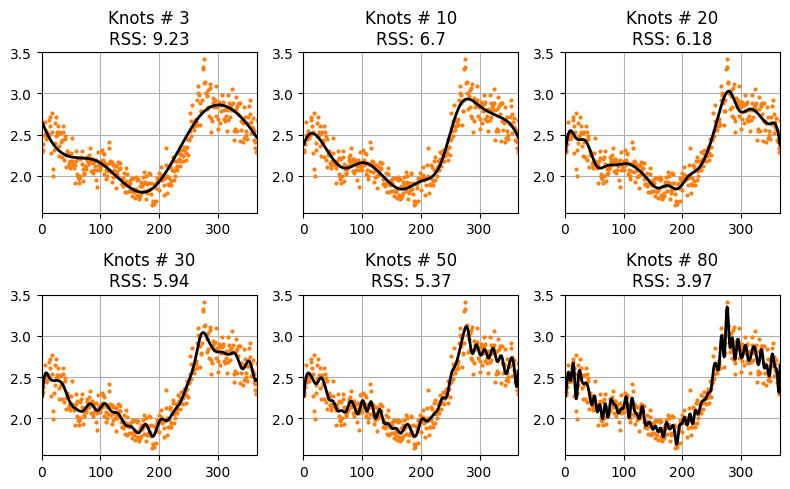

In [113]:
def spline(knots, x, y):
    x_new = np.linspace(0, 1, knots+2)[1:-1]
    t, c, k = interpolate.splrep(x, y, t=np.quantile(x, x_new), s=3)
    yfit = interpolate.BSpline(t,c, k)(x)
    return yfit

knots = [3, 10, 20, 30, 50, 80]
i = 0

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 5))

for row in range(2):
    for col in range(3):
        ax[row][col].plot(x, y, '.',c='tab:orange', markersize=4)
        yfit = spline(knots[i], x, y)
        rss = np.sum( np.square(y-yfit) )
        ax[row][col].plot(x, yfit, 'k', linewidth=2)
        ax[row][col].set_title("Knots # "+str(knots[i])+"\nRSS: "+str(round(rss,2)), color='k')
        ax[row][col].set_xlim(0,366)
        ax[row][col].grid()
        i=i+1
        
plt.tight_layout()        
plt.show() 

#### 4. Fourier series to model the volatility of temperature

$$ \sigma_t = a_0 + \sum_{i=1}^I a_i \cos(i \omega t) + \sum_{j=1}^J b_j \sin(j \omega t) $$

In [119]:
# pip install symfit

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 63 kB 2.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


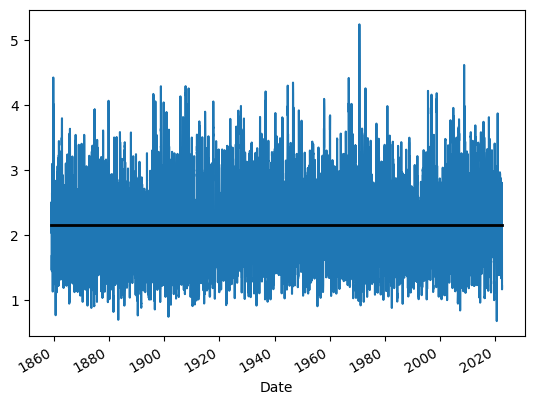

In [121]:
std = temp_t['T'].rolling(30).std()

std.plot()
plt.plot([std.index[0], std.index[-1]], [std.mean(),std.mean()], 'k', linewidth=2)
plt.show()

In [136]:
from symfit import parameters, variables, sin, cos, Fit

def fourier_series(x, f, n=0):
    """
    Returns a symbolic fourier series of order `n`.

    :param n: Order of the fourier series.
    :param x: Independent variable
    :param f: Frequency of the fourier series
    """
    # Make the parameter objects for all the terms
    f=2*np.pi/365.25
    a0, *cos_a = parameters(','.join(['a{}'.format(i) for i in range(0, n + 1)]))
    sin_b = parameters(','.join(['b{}'.format(i) for i in range(1, n + 1)]))
    # Construct the series
    series = a0 + sum(ai * cos(i * f * x) + bi * sin(i * f * x)
                     for i, (ai, bi) in enumerate(zip(cos_a, sin_b), start=1))
    return series

x, y = variables('x, y')

# Define frequency as yearly
w = 2*np.pi/365.25
model_dict = {y: fourier_series(x, f=w, n=3)}
print('Example of Fourier Model \n', model_dict)

Example of Fourier Model 
 {y: a0 + a1*cos(0.0172024238389585*x) + a2*cos(0.034404847677917*x) + a3*cos(0.0516072715168755*x) + b1*sin(0.0172024238389585*x) + b2*sin(0.034404847677917*x) + b3*sin(0.0516072715168755*x)}


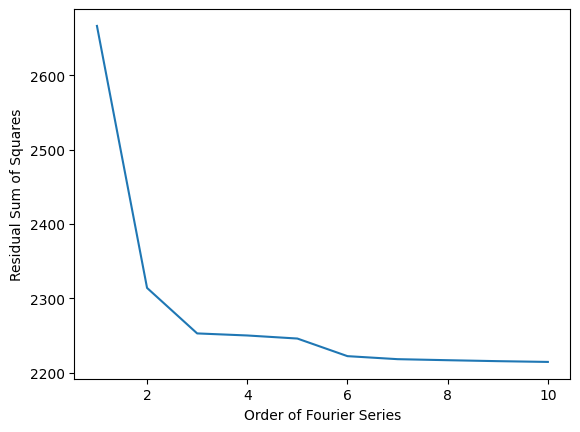

In [133]:
if isinstance(std.index , pd.DatetimeIndex):
    first_ord = std.index.map(dt.datetime.toordinal)[0]
    std.index=std.index.map(dt.datetime.toordinal)

time_mask = -int(30*365.25)

# Make step function data
xdata = std.index[time_mask:] - first_ord
ydata = np.array(std[time_mask:])

rss = []
for fourier_order in range(1,11):
    model_dict = {y: fourier_series(x, f=w, n=fourier_order)}
    
    # Define a Fit object for this model and data
    fit = Fit(model_dict, x=xdata, y=ydata)
    fit_result = fit.execute()
    rss.append(fit_result.chi_squared)
    
plt.plot(range(1,11),rss)
plt.ylabel('Residual Sum of Squares')
plt.xlabel('Order of Fourier Series')
plt.show()

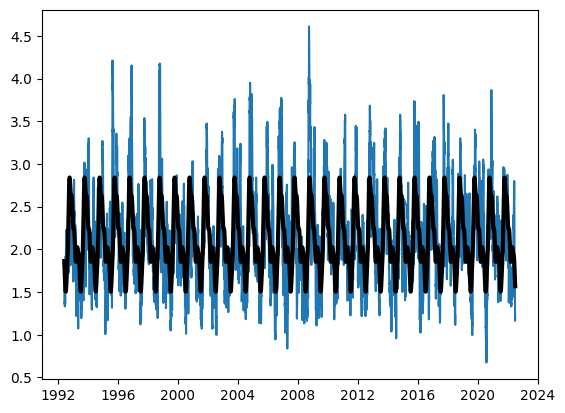

In [138]:
model_dict = {y: fourier_series(x, f=w, n=6)}

# Define a Fit object for this model and data
fit = Fit(model_dict, x=xdata, y=ydata)
fit_result = fit.execute()

# Map back to datetime from ordinal
xdata2=(xdata+first_ord).map(dt.datetime.fromordinal)

# Plot the result
plt.plot(xdata2, ydata)
plt.plot(xdata2, fit.model(x=xdata, **fit_result.params).y, 'k-', linewidth=3)

In [139]:
print("Fourier Series Parameters:")
for i,v in fit_result.params.items():
    print(i,round(v,3))

Fourier Series Parameters:
a0 2.133
a1 0.386
a2 -0.135
a3 0.012
a4 0.006
a5 0.003
a6 -0.04
b1 -0.241
b2 -0.215
b3 0.105
b4 0.022
b5 -0.027
b6 -0.052


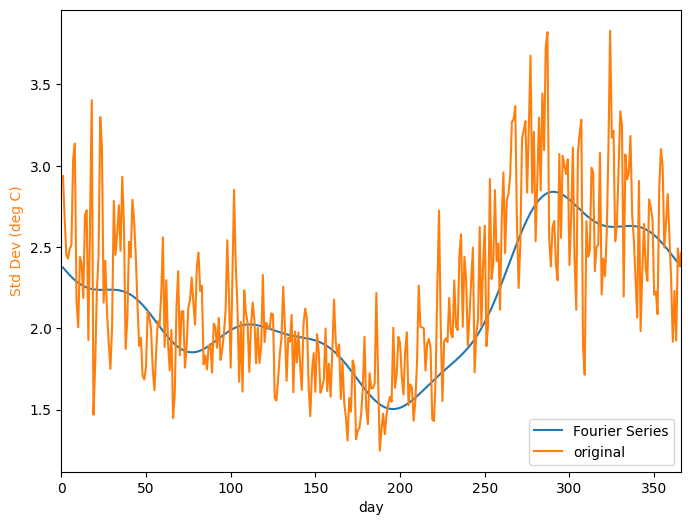

In [140]:
fourier = pd.DataFrame({'date':xdata2,
                        'day':xdata2.dayofyear, 
                        'volatility':ydata,
                        'model':fit.model(x=xdata, **fit_result.params).y})
fourier.index = fourier.date
fourier = fourier.drop(columns='date')
fourier_model = fourier.groupby(['day'])['model'].agg(['mean','std'])

vol = temp_t[time_mask:].groupby(['day'])['T'].agg(['mean','std'])
x = np.array(vol['std'].index)
y = np.array(vol['std'].values)

fourier_model['mean'].plot(color='tab:blue', figsize=(8,6), label='Fourier Series')
plt.ylabel('Std Dev (deg C)',color='tab:orange')

plt.plot(x, y, color='tab:orange', label='original')
plt.xlim(0,366) 
plt.legend(loc='lower right')
plt.show()

#### 5. Stochastic differential equation

$$ d T_t = \left[ \frac{d\bar{T}_t}{dt} + 0.438(\bar{T}_t - T_t) \right] dt + \sigma_t dW_{1,t} $$

$$ d\sigma_t = k_\sigma (\bar{\sigma}_t - \sigma_t) dt + \gamma_t dW_{2,t} $$

Trend or long term volatility is easy: ~ 2.149


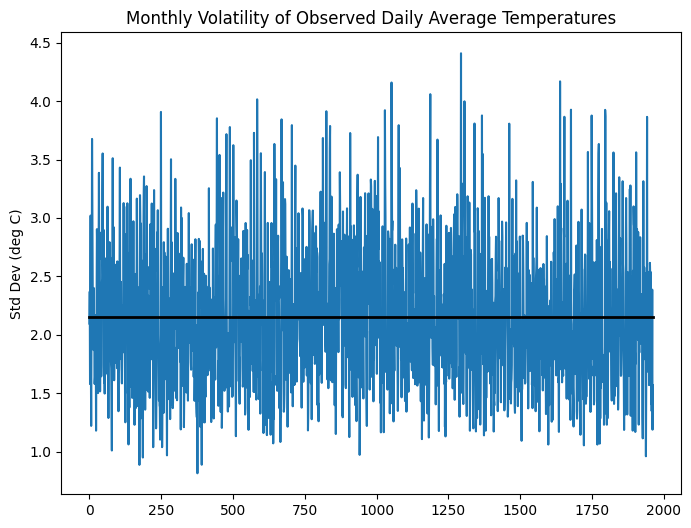

In [142]:
# already done above
# temp_t['day'] = temp_t.index.dayofyear
# temp_t['month'] = temp_t.index.month
# temp_t['year'] = temp_t.index.year

vol = temp_t.groupby(['year','month'])['T'].agg(['mean','std'])
vol = vol.reset_index()

vol['std'].plot(figsize=(8,6))
plt.plot([0, len(vol)], [vol['std'].mean(),vol['std'].mean()], 'k', linewidth=2)
plt.ylabel('Std Dev (deg C)')
plt.title('Monthly Volatility of Observed Daily Average Temperatures', color='k',)
print('Trend or long term volatility is easy: ~', round(vol['std'].mean(),3))
plt.show()

The volatility estimator is based on the quadratic variation of the volatility process $\sigma_t$

$$ \hat{\gamma}_t = \sqrt{\frac{1}{N_t} \sum_{i=0}^{N-1} (\sigma_i + 1 - \sigma_i)^2} $$

In [143]:
print('Gamma is: ', round(vol['std'].std(),3))
model = AutoReg(vol['std'], lags=1, old_names=True,trend='n')
model_fit  = model.fit()
coef = model_fit.params
res = model_fit.resid
print('Rate of mean reversion of volatility process is : ', coef[0])
print(model_fit.summary())

Gamma is:  0.58
Rate of mean reversion of volatility process is :  0.9538808996819301
                            AutoReg Model Results                             
Dep. Variable:                    std   No. Observations:                 1963
Model:                     AutoReg(1)   Log Likelihood               -1990.497
Method:               Conditional MLE   S.D. of innovations              0.667
Date:                Tue, 23 Apr 2024   AIC                           3984.995
Time:                        13:42:40   BIC                           3996.158
Sample:                             1   HQIC                          3989.098
                                 1963                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
std.L1         0.9539      0.007    140.908      0.000       0.941       0.967
                                    Roots    

/var/folders/57/dq27lfpd1zb7kzzggckgkm2h0000gn/T/ipykernel_75894/3886525345.py:2: FutureWarning: old_names will be removed after the 0.14 release. You should stop setting this parameter and use the new names.
  model = AutoReg(vol['std'], lags=1, old_names=True,trend='n')


Therefore:

$$ d T_t = \left[ \frac{d\bar{T}_t}{dt} + 0.438(\bar{T}_t - T_t) \right] dt + \sigma_t dW_{1,t} $$

$$ d\sigma_t = 0.954 (2.15 - \sigma_t) dt + 0.580 dW_{2,t} $$

# 8. Monte Carlo Simulation of Temperature for Weather Derivative Pricing

GOAL:

Aim: we want to price temperature options.

Underlying: HDD/CDD index over given period. 

#### Monte Carlo Simulation of Temperature Pathes
With Euler scheme of approximation

$$ T_{i+1} = T_i + \bar{T}'_i + \kappa (\bar{T}_i - T_i) + \sigma_i z_i $$

In [149]:
import os 
import numpy as np
import pandas as pd
import datetime as dt
from scipy import interpolate

import matplotlib.pyplot as plt

max_temp = pd.read_csv('https://raw.githubusercontent.com/ASXPortfolio/jupyter-notebooks-data/main/maximum_temperature.csv')
min_temp = pd.read_csv('https://raw.githubusercontent.com/ASXPortfolio/jupyter-notebooks-data/main/minimum_temperature.csv')

def datetime(row):
    return dt.datetime(row.Year,row.Month,row.Day)

max_temp['Date'] = max_temp.apply(datetime,axis=1)
min_temp['Date'] = min_temp.apply(datetime,axis=1)
max_temp.set_index('Date', inplace=True)
min_temp.set_index('Date', inplace=True)
drop_cols = [0,1,2,3,4,6,7]
max_temp.drop(max_temp.columns[drop_cols],axis=1,inplace=True)
min_temp.drop(min_temp.columns[drop_cols],axis=1,inplace=True)
max_temp.rename(columns={'Maximum temperature (Degree C)':'Tmax'}, inplace=True)
min_temp.rename(columns={'Minimum temperature (Degree C)':'Tmin'}, inplace=True)

temps = max_temp.merge(min_temp,how='inner',left_on=['Date'],right_on=['Date'])

def avg_temp(row):
    return (row.Tmax+row.Tmin)/2

temps['T'] = temps.apply(avg_temp,axis=1)

# drop na values here
temps = temps.dropna()

temp_t = temps['T'].copy(deep=True)
temp_t = temp_t.to_frame()

temp_t.head()

,T
Date,
1859-01-01,19.45
1859-01-02,20.05
1859-01-03,19.75
1859-01-04,21.05
1859-01-05,20.75


<Axes: xlabel='Date'>

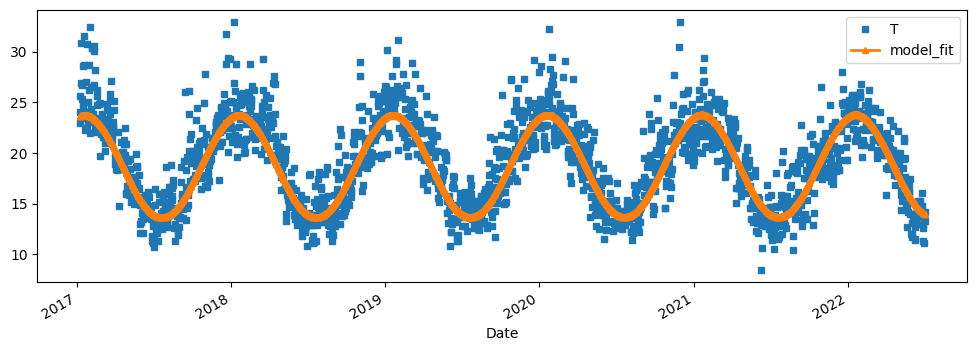

In [150]:
if isinstance(temp_t.index , pd.DatetimeIndex):
    first_ord = temp_t.index.map(dt.datetime.toordinal)[0]
    temp_t.index=temp_t.index.map(dt.datetime.toordinal)
    
def T_model(x, a, b, alpha, theta):
    omega = 2*np.pi/365.25
    T = a + b*x + alpha*np.sin(omega*x + theta)
    return T

def dT_model(x, a, b, alpha, theta):
    omega=2*np.pi/365.25
    dT =  b + alpha*omega*np.cos(omega*x + theta)
    return dT

Tbar_params = [16.8, 3.32e-05, 5.05, 1.27]

temp_t['model_fit'] = T_model(temp_t.index-first_ord, *Tbar_params)

if not isinstance(temp_t.index , pd.DatetimeIndex):
    temp_t.index=temp_t.index.map(dt.datetime.fromordinal)

temp_t[-2000:].plot(figsize=(12,4), style=['s','^-','k--'] , markersize=4, linewidth=2 )

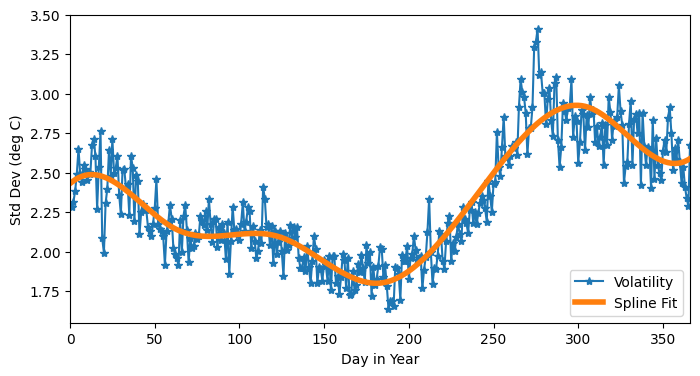

In [151]:
temp_vol = temps['T'].copy(deep=True)
temp_vol = temp_vol.to_frame()
temp_vol['day'] = temp_vol.index.dayofyear
temp_vol['month'] = temp_vol.index.month

vol = temp_vol.groupby(['day'])['T'].agg(['mean','std'])
days = np.array(vol['std'].index)
T_std = np.array(vol['std'].values)

def spline(knots, x, y):
    x_new = np.linspace(0, 1, knots+2)[1:-1]
    t, c, k = interpolate.splrep(x, y, t=np.quantile(x, x_new), s=3)
    yfit = interpolate.BSpline(t,c, k)(x)
    return yfit

volatility = spline(5, days, T_std)
plt.figure(figsize=(8,4))
plt.plot(days, T_std, marker='*',label='Volatility')
plt.plot(days, volatility, linewidth=4, label='Spline Fit')
plt.ylabel('Std Dev (deg C)')
plt.xlabel('Day in Year')
plt.xlim(0,366) 
plt.legend(loc='lower right')
plt.show()

In [152]:
def euler_step(row, kappa, M):
    """Function for euler scheme approximation step in 
    modified OH dynamics for temperature simulations
    Inputs: 
    - dataframe row with columns: T, Tbar, dTbar and vol
    - kappa: rate of mean reversion
    Output:
    - temp: simulated next day temperatures
    """
    if row['Tbar_shift'] != np.nan:
        T_i = row['Tbar']
    else:
        T_i = row['Tbar_shift']  
    T_det = T_i + row['dTbar']
    T_mrev =  kappa*(row['Tbar'] - T_i)
    sigma = row['vol']*np.random.randn(M)
    return T_det + T_mrev + sigma

def monte_carlo_temp(trading_dates, Tbar_params, vol_model, first_ord, M=1, kappa=0.438):
    """Monte Carlo simulation of temperature
    Inputs:
    - trading_dates: pandas DatetimeIndex from start to end dates
    - M: number of simulations
    - Tbar_params: parameters used for Tbar model
    - vol_model: fitted volatility model with days in year index
    - first_ord: first ordinal of fitted Tbar model
    Outputs:
    - mc_temps: DataFrame of all components individual components
    - mc_sims: DataFrame of all simulated temerpature paths
    """
    if isinstance(trading_dates, pd.DatetimeIndex):
        trading_date=trading_dates.map(dt.datetime.toordinal)
      
    # Use Modified Ornstein-Uhlenbeck process with estimated parameters to simulate Tbar DAT 
    Tbars = T_model(trading_date-first_ord, *Tbar_params) 
    
    # Use derivative of modified OH process SDE to calculate change of Tbar
    dTbars = dT_model(trading_date-first_ord, *Tbar_params) 
    
    # Create DateFrame with thi
    mc_temps = pd.DataFrame(data=np.array([Tbars, dTbars]).T,
                            index=trading_dates, columns=['Tbar','dTbar'])
    
    # Create columns for day in year
    mc_temps['day'] = mc_temps.index.dayofyear
    
    # Apply BSpline volatility model depending on day of year 
    mc_temps['vol'] = vol_model[mc_temps['day']-1]

    # Shift Tbar by one day (lagged Tbar series)
    mc_temps['Tbar_shift'] = mc_temps['Tbar'].shift(1)  
    
    # Apply Euler Step Pandas Function
    data = mc_temps.apply(euler_step, args=[kappa, M], axis=1)
    
    # Create final DataFrame of all simulations
    mc_sims = pd.DataFrame(data=[x for x in [y for y in data.values]], 
                 index=trading_dates,columns=range(1,M+1))
    
    return mc_temps, mc_sims

In [153]:
# define trading date range
no_sims = 5
trading_dates = pd.date_range(start='2022-09-01', end='2025-08-31', freq='D')
mc_temps, mc_sims = monte_carlo_temp(trading_dates, Tbar_params, volatility, first_ord, no_sims)

In [154]:
mc_temps

,Tbar,dTbar,day,vol,Tbar_shift
2022-09-01,15.004367,0.057635,244,2.415893,NaN
2022-09-02,15.062558,0.058745,245,2.430148,15.004367
2022-09-03,15.121850,0.059837,246,2.444373,15.062558
2022-09-04,15.182227,0.060912,247,2.458559,15.121850
2022-09-05,15.243669,0.061969,248,2.472699,15.182227
...,...,...,...,...,...
2025-08-27,14.779898,0.052135,239,2.344455,14.728364
2025-08-28,14.832628,0.053323,240,2.358738,14.779898
2025-08-29,14.886538,0.054495,241,2.373031,14.832628
2025-08-30,14.941613,0.055651,242,2.387327,14.886538


In [155]:
mc_sims

,1,2,3,4,5
2022-09-01,15.414275,14.724248,15.313295,13.215008,16.322930
2022-09-02,14.188532,15.297368,18.932015,16.341860,15.421087
2022-09-03,14.040481,10.921455,15.104761,13.454141,13.221715
2022-09-04,15.157752,17.309820,15.185142,13.039522,13.002912
2022-09-05,8.370276,14.030106,20.946072,16.680910,10.893853
...,...,...,...,...,...
2025-08-27,12.893060,14.336613,18.804585,16.089490,14.906121
2025-08-28,16.317234,17.330154,15.610104,13.424695,16.236700
2025-08-29,16.791596,15.542461,12.939850,13.591999,18.196160
2025-08-30,17.007159,18.466739,14.900523,12.131160,13.910555


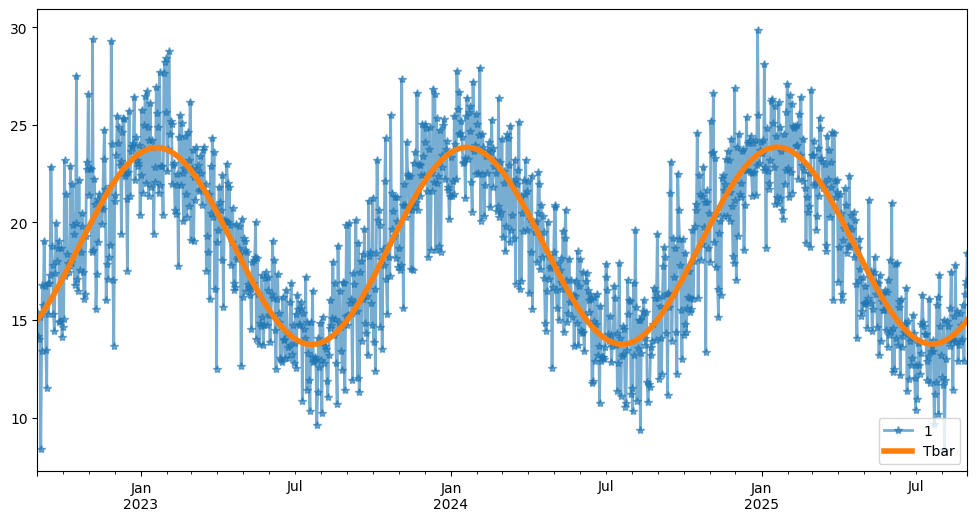

In [162]:
plt.figure(figsize=(12,6))
mc_sims[1].plot(alpha=0.6,linewidth=2, marker='*')
mc_temps["Tbar"].plot(linewidth=4)
plt.legend(loc='lower right')
plt.show()

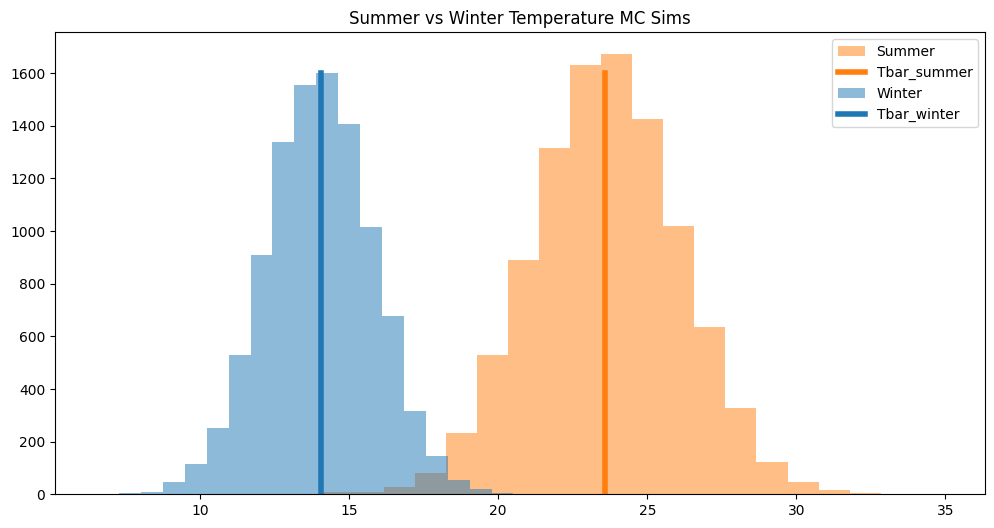

In [164]:
no_sims = 10000
trading_dates_winter = pd.date_range(start='2023-07-01', end='2023-07-01', freq='D')
mc_temps_winter, mc_sims_winter = monte_carlo_temp(trading_dates_winter, Tbar_params, volatility, first_ord, no_sims)

trading_dates_summer = pd.date_range(start='2023-01-01', end='2023-01-01', freq='D')
mc_temps_summer, mc_sims_summer = monte_carlo_temp(trading_dates_summer, Tbar_params, volatility, first_ord, no_sims)

plt.figure(figsize=(12,6))
plt.title('Winter vs Summer Temperature MC Sims')

Tbar_summer = mc_temps_summer.iloc[-1,:]['Tbar']
Tbar_winter = mc_temps_winter.iloc[-1,:]['Tbar']

plt.hist(mc_sims_summer.iloc[-1,:],bins=20, alpha=0.5, label='Summer', color='tab:orange')
plt.plot([Tbar_summer,Tbar_summer],[0,1600], linewidth=4, label='Tbar_summer', color='tab:orange')
plt.title('Summer vs Winter Temperature MC Sims')

plt.hist(mc_sims_winter.iloc[-1,:],bins=20, alpha=0.5, label='Winter', color='tab:blue')
plt.plot([Tbar_winter,Tbar_winter],[0,1600], linewidth=4, label='Tbar_winter', color='tab:blue')
plt.legend()
plt.show()

# 9. Risk-Neutral Pricing of Weather Derivatives

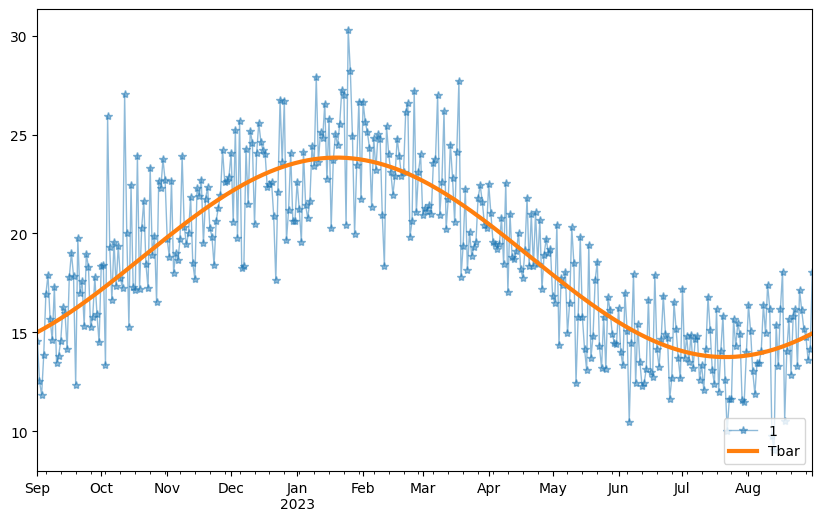

In [165]:
# define trading date range
trading_dates = pd.date_range(start='2022-09-01', end='2023-08-31', freq='D')
volatility = spline(5, days, T_std)
mc_temps, mc_sims = monte_carlo_temp(trading_dates, Tbar_params, volatility, first_ord)

plt.figure(figsize=(10,6))
mc_sims[1].plot(alpha=0.5,linewidth=1, marker='*')
mc_temps["Tbar"].plot(linewidth=3)
plt.legend(loc='lower right')
plt.show()

Weather Derivative Market is an incomplete market, because the underlying variable, the temperature is not tradable. Therefore we have to consider the market price of risk $\lambda$ to obtain unique prices for such contracts.

Under Martingale Measure Q:

$$ dT_t^{\mathbb{Q}} = \left[ \frac{d\bar{T}_t}{dt} + \kappa (\bar{T}_t - T_t) - \lambda \sigma_t \right] dt + \sigma_t dW_t^{\mathbb{Q}} $$


Under Physical Probability Measure P: 

$$ dT_t^{\mathbb{P}} = \left[ \frac{d\bar{T}_t}{dt} + \kappa (\bar{T}_t - T_t) \right] dt + \sigma_t dW_t^{\mathbb{P}} $$



#### Method 1: Alternative Black Scholes Approach

In [166]:
trading_dates = pd.date_range(start='2023-06-01', end='2023-08-31', freq='D')
volatility = spline(5, days, T_std)
mc_temps, mc_sims = monte_carlo_temp(trading_dates, Tbar_params, volatility, first_ord)

print('Probability P(max(18-Tn, 0) = 0): {0:1.1f}%'.format(len(mc_sims[mc_sims[1] >= 18])/len(mc_sims)*100))

Probability P(max(18-Tn, 0) = 0): 4.3%


In [167]:
def rn_mean(time_arr, vol_arr, Tbars, lamda, kappa):
    """Evaluate the risk neutral integral above for each segment of constant volatility
    Rectangular integration with step size of days
    """
    dt = 1/365.25
    N = len(time_arr)
    mean_intervals = -vol_arr*(1 - np.exp(-kappa*dt))/kappa
    return 18*N - (np.sum(Tbars) - lamda*np.sum(mean_intervals))

def rn_var(time_arr, vol_arr, kappa):
    """Evaluate the risk neutral integral above for each segment of constant volatility
    Rectangular integration with step size of days
    """
    dt = 1/365.25 
    var_arr = np.power(vol_arr,2) 
    var_intervals = var_arr/(2*kappa)*(1-np.exp(-2*kappa*dt))
    cov_sum = 0
    for i, ti in enumerate(time_arr):
        for j, tj in enumerate(time_arr):
            if j > i:
                cov_sum += np.exp(-kappa*(tj-ti)) * var_intervals[i]
    return np.sum(var_intervals) + 2*cov_sum

def risk_neutral(trading_dates, Tbar_params, vol_model, first_ord, lamda, kappa=0.438):
    if isinstance(trading_dates, pd.DatetimeIndex):
        trading_date=trading_dates.map(dt.datetime.toordinal)
  
    Tbars = T_model(trading_date-first_ord, *Tbar_params) 
    dTbars = dT_model(trading_date-first_ord, *Tbar_params) 
    mc_temps = pd.DataFrame(data=np.array([Tbars, dTbars]).T,
                            index=trading_dates, columns=['Tbar','dTbar'])
    mc_temps['day'] = mc_temps.index.dayofyear
    mc_temps['vol'] = vol_model[mc_temps['day']-1]
    time_arr = np.array([i/365.25 for i in range(1,len(trading_dates)+1)])
    vol_arr = mc_temps['vol'].values
    mu_rn = rn_mean(time_arr, vol_arr, Tbars, lamda, kappa)
    var_rn = rn_var(time_arr, vol_arr, kappa)
    return mu_rn, var_rn

In [168]:
def winter_option(trading_dates, r, alpha, K, tau, opt='c', lamda=0.0):
    """Evaluate the fair value of temperature option in winter
    Based on heating degree days only if the physical probability that 
    the average temperature exceeds the Tref (18 degC) is close to 0 
    """
    mu_rn, var_rn = risk_neutral(trading_dates, Tbar_params, volatility, first_ord, lamda)
    disc = np.exp(-r*tau)
    vol_rn = np.sqrt(var_rn)
    zt = (K - mu_rn)/vol_rn
    exp = np.exp(-zt**2/2)
    if opt == 'c':
        return alpha*disc*((mu_rn - K)*stats.norm.cdf(-zt) + vol_rn*exp/np.sqrt(2*np.pi))
    else:
        exp2 = np.exp(-mu_rn**2/(2*vol_rn**2))
        return alpha*disc*((K - mu_rn)*(stats.norm.cdf(zt) - stats.norm.cdf(-mu_rn/vol_rn)) +
                           vol_rn/np.sqrt(2*np.pi)*(exp-exp2))


trading_dates = pd.date_range(start='2023-06-01', end='2023-08-31', freq='D')
r=0.05
K=300
alpha=2500

def years_between(d1, d2):
    d1 = dt.datetime.strptime(d1, "%Y-%m-%d")
    d2 = dt.datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)/365.25

start = dt.datetime.today().strftime('%Y-%m-%d')
end = '2023-08-31'

tau = years_between(start, end)

print('Start Valuation Date:', start, 
      '\nEnd of Contract Date:', end, 
      '\nYears between Dates :', round(tau,3))

print('Call Price: ', round(winter_option(trading_dates, r, alpha, K, tau, 'c'),2))
print('Put Price : ', round(winter_option(trading_dates, r, alpha, K, tau, 'p'),2))

Start Valuation Date: 2024-04-23 
End of Contract Date: 2023-08-31 
Years between Dates : 0.646
Call Price:  104427.21
Put Price :  0.0


#### Method 2: Monte Carlo Valuation

In [169]:
# define trading date range
trading_dates = pd.date_range(start='2023-06-01', end='2023-08-31', freq='D')
no_sims = 10000
vol_model = spline(5, days, T_std)

def temperature_option(trading_dates, no_sims, Tbar_params, vol_model, r, alpha, K, tau, first_ord, opt='c'):
    "Evaluates the price of a temperature call option"
    mc_temps, mc_sims = monte_carlo_temp(trading_dates, Tbar_params, volatility, first_ord, no_sims)
    N, M = np.shape(mc_sims)
    mc_arr = mc_sims.values
    DD = np.sum(np.maximum(18-mc_arr,0), axis=0)
    if opt == 'c':
        CT = alpha*np.maximum(DD-K,0)
    else:
        CT = alpha*np.maximum(K-DD,0)
    C0 = np.exp(-r*tau)*np.sum(CT)/M
    sigma = np.sqrt( np.sum( (np.exp(-r*tau)*CT - C0)**2) / (M-1) )
    SE = sigma/np.sqrt(M)
    return C0, SE

call = np.round(temperature_option(trading_dates, no_sims, Tbar_params, vol_model, r, alpha, K, tau, first_ord, 'c'),2)
put = np.round(temperature_option(trading_dates, no_sims, Tbar_params, vol_model, r, alpha, K, tau, first_ord, 'p'),2)
print('Call Price: {0} +/- {1} (2se)'.format(call[0], call[1]*2))
print('Put Price : {0} +/- {1} (2se)'.format(put[0], put[1]*2))

Call Price: 112580.72 +/- 886.9 (2se)
Put Price : 86.29 +/- 29.1 (2se)


#### Compare the result

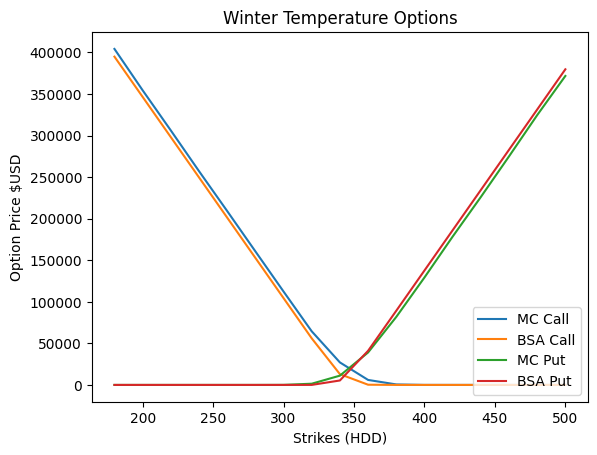

In [170]:
strikes = np.arange(180,520,20)
data = np.zeros(shape=(len(strikes),4))
for i, strike in enumerate(strikes):
    data[i,0] = temperature_option(trading_dates, no_sims, Tbar_params, vol_model, r, alpha, strike, tau, first_ord, 'c')[0]
    data[i,1] = winter_option(trading_dates, r, alpha, strike, tau, 'c')
    data[i,2] = temperature_option(trading_dates, no_sims, Tbar_params, vol_model, r, alpha, strike, tau, first_ord, 'p')[0]
    data[i,3] = winter_option(trading_dates, r, alpha, strike, tau, 'p')

df = pd.DataFrame({'MC Call': data[:, 0], 'BSA Call': data[:, 1], 'MC Put': data[:, 2], 'BSA Put': data[:, 3]})
df.index = strikes

plt.plot(df)
plt.title('Winter Temperature Options')
plt.ylabel('Option Price $USD')
plt.xlabel('Strikes (HDD)')
plt.legend(df.columns, loc=4)
plt.show()